-Getting player data since 2000 from Season Stats CSV
-Getting team roster 

In [493]:
#Libraries/Imports

import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import numpy as np

In [690]:
allLinks = []

for year in range(2000,2023):
    url = "https://www.basketball-reference.com/leagues/NBA_{}.html".format(year)

    response = requests.request("GET", url).text
    soupStruct = bs(response)

    allTables = soupStruct.findAll('table')[:2]
    
    for table in allTables:
        for row in table.find_all('tr'):
            for th in row.find_all('th'):
                aTag = th.a
                if aTag != None:
                    allLinks.append(aTag['href'])
print(allLinks)

['/teams/MIA/2000.html', '/teams/NYK/2000.html', '/teams/PHI/2000.html', '/teams/ORL/2000.html', '/teams/BOS/2000.html', '/teams/NJN/2000.html', '/teams/WAS/2000.html', '/teams/IND/2000.html', '/teams/CHH/2000.html', '/teams/TOR/2000.html', '/teams/DET/2000.html', '/teams/MIL/2000.html', '/teams/CLE/2000.html', '/teams/ATL/2000.html', '/teams/CHI/2000.html', '/teams/UTA/2000.html', '/teams/SAS/2000.html', '/teams/MIN/2000.html', '/teams/DAL/2000.html', '/teams/DEN/2000.html', '/teams/HOU/2000.html', '/teams/VAN/2000.html', '/teams/LAL/2000.html', '/teams/POR/2000.html', '/teams/PHO/2000.html', '/teams/SEA/2000.html', '/teams/SAC/2000.html', '/teams/GSW/2000.html', '/teams/LAC/2000.html', '/teams/PHI/2001.html', '/teams/MIA/2001.html', '/teams/NYK/2001.html', '/teams/ORL/2001.html', '/teams/BOS/2001.html', '/teams/NJN/2001.html', '/teams/WAS/2001.html', '/teams/MIL/2001.html', '/teams/TOR/2001.html', '/teams/CHH/2001.html', '/teams/IND/2001.html', '/teams/DET/2001.html', '/teams/CLE/200

In [691]:
scrapedData = pd.DataFrame(data = None, index = None, columns = None, dtype = None, copy = None)

for link in allLinks:
    #creating the link with array with combo of links and years
    url = "https://www.basketball-reference.com" + link
    
    #sending request
    response = requests.request("GET", url).text
    soup = bs(response)
    
    #finding the record by looking for the word "Record:"
    record = soup.find(lambda tag: tag.name == "strong" and "Record:" in tag.text).next_sibling 
    winsLoss = record.split(',')[0].strip().split('-') #looking for wins
    wins = int(winsLoss[0])
    losses = int(winsLoss[1])
    
    #finding the correct table from the team website by looking for keywords "Totals"
    rosterTable = soup.find(lambda tag: tag.name == "h2" and "Advanced" in tag.text).find_next("table")
    
    #converting from html to dataframe
    teamRosterDF = pd.read_html(str(rosterTable))[0]
    
    #adding the year,team, wins, and losses to the dataframe
    teamRosterDF["Year"] = url[-9:-5]
    teamRosterDF["Team"] = url[-13:-10]
    teamRosterDF["Wins"] = wins
    teamRosterDF["Losses"] = losses
    teamRosterDF.rename(columns = {'Unnamed: 1':'Name'}, inplace = True) #renaming the name column
    scrapedData = scrapedData.append(teamRosterDF) #adding to the complete roster data
scrapedData = scrapedData.dropna(subset=['Name'])
del rosterData["Unnamed 22"]
del rosterData["Unnamed 17"]
scrapedData

Rk              Name  Age   G    MP   PER    TS%   3PAr    FTr  ORB%  ...  \
0    1    Jamal Mashburn   27  76  2828  15.4  0.526  0.240  0.206   2.8  ...   
1    2   Alonzo Mourning   29  79  2748  25.8  0.596  0.003  0.492   9.5  ...   
2    3       Dan Majerle   34  69  2308  11.4  0.559  0.720  0.164   1.4  ...   
3    4        P.J. Brown   30  80  2302  15.3  0.516  0.001  0.237  11.4  ...   
4    5    Anthony Carter   24  79  1859  11.0  0.442  0.045  0.244   3.1  ...   
..  ..               ...  ...  ..   ...   ...    ...    ...    ...   ...  ...   
14  15       Daishen Nix   19  24   261   8.1  0.480  0.388  0.448   2.9  ...   
15  16      Usman Garuba   19  24   239  12.9  0.510  0.455  0.159   9.6  ...   
16  17  Danuel House Jr.   28  16   233   6.8  0.467  0.459  0.257   1.9  ...   
17  18    Bruno Fernando   23  10    94  26.5  0.699  0.024  0.463  12.8  ...   
18  19    Trevelin Queen   24  10    74  18.2  0.619  0.727  0.121  10.3  ...   

    WS/48  Unnamed: 22  OBPM  DBPM  BPM  VORP  Year  Team  Wins  Losses  
0   0.109          NaN   0.9  -0.4  0.5   1.8  2000   MIA    52      30  
1   0.226          NaN   3.1   2.2  5.3   5.0  2000   MIA    52      30  
2   0.126          NaN  -0.2   2.1  1.9   2.3  2000   MIA    52      30  
3   0.143          NaN  -0.3   0.6  0.3   1.4  2000   MIA    52      30  
4   0.036          NaN  -3.0   0.2 -2.7  -0.4  2000   MIA    52      30  
..    ...          ...   ...   ...  ...   ...   ...   ...   ...     ...  
14 -0.033          NaN  -5.4  -1.0 -6.4  -0.3  2022   HOU    20      62  
15  0.105          NaN  -1.8   0.9 -0.9   0.1  2022   HOU    20      62  
16 -0.049          NaN  -4.8  -0.7 -5.6  -0.2  2022   HOU    20      62  
17  0.164          NaN   1.3   0.2  1.5   0.1  2022   HOU    20      62  
18  0.080          NaN   2.7  -0.8  1.9   0.1  2022   HOU    20      62  

[12412 rows x 31 columns]

In [692]:
scrapedData.reset_index(drop = True,inplace = True)
scrapedData.to_csv("all_player_data.csv", index = False)

rosterData =  pd.read_csv("all_player_data.csv")

rosterData

Rk              Name  Age   G    MP   PER    TS%   3PAr    FTr  ORB%  \
0       1    Jamal Mashburn   27  76  2828  15.4  0.526  0.240  0.206   2.8   
1       2   Alonzo Mourning   29  79  2748  25.8  0.596  0.003  0.492   9.5   
2       3       Dan Majerle   34  69  2308  11.4  0.559  0.720  0.164   1.4   
3       4        P.J. Brown   30  80  2302  15.3  0.516  0.001  0.237  11.4   
4       5    Anthony Carter   24  79  1859  11.0  0.442  0.045  0.244   3.1   
...    ..               ...  ...  ..   ...   ...    ...    ...    ...   ...   
12407  15       Daishen Nix   19  24   261   8.1  0.480  0.388  0.448   2.9   
12408  16      Usman Garuba   19  24   239  12.9  0.510  0.455  0.159   9.6   
12409  17  Danuel House Jr.   28  16   233   6.8  0.467  0.459  0.257   1.9   
12410  18    Bruno Fernando   23  10    94  26.5  0.699  0.024  0.463  12.8   
12411  19    Trevelin Queen   24  10    74  18.2  0.619  0.727  0.121  10.3   

       ...  WS/48  Unnamed: 22  OBPM  DBPM  BPM  VORP  Year  Team  Wins  \
0      ...  0.109          NaN   0.9  -0.4  0.5   1.8  2000   MIA    52   
1      ...  0.226          NaN   3.1   2.2  5.3   5.0  2000   MIA    52   
2      ...  0.126          NaN  -0.2   2.1  1.9   2.3  2000   MIA    52   
3      ...  0.143          NaN  -0.3   0.6  0.3   1.4  2000   MIA    52   
4      ...  0.036          NaN  -3.0   0.2 -2.7  -0.4  2000   MIA    52   
...    ...    ...          ...   ...   ...  ...   ...   ...   ...   ...   
12407  ... -0.033          NaN  -5.4  -1.0 -6.4  -0.3  2022   HOU    20   
12408  ...  0.105          NaN  -1.8   0.9 -0.9   0.1  2022   HOU    20   
12409  ... -0.049          NaN  -4.8  -0.7 -5.6  -0.2  2022   HOU    20   
12410  ...  0.164          NaN   1.3   0.2  1.5   0.1  2022   HOU    20   
12411  ...  0.080          NaN   2.7  -0.8  1.9   0.1  2022   HOU    20   

       Losses  
0          30  
1          30  
2          30  
3          30  
4          30  
...       ...  
12407      62  
12408      62  
12409      62  
12410      62  
12411      62  

[12412 rows x 31 columns]

In [693]:
rosterData["Previous TS%"] = 0
rosterData["Previous TRB%"] = 0
rosterData["Previous AST%"] = 0
rosterData["Previous BPM"] = 0
rosterData["Previous VORP"] = 0
rosterData["Previous WS"] = 0
rosterData["Previous WS/48"] = 0
rosterData["Rookie"] = False

for index, row in rosterData.iterrows():
    currentYear = row["Year"]
    previousYear = currentYear - 1
    name = row["Name"]
    
    if currentYear == 2000:
        rosterData.loc[index,"Previous TS%"] = np.nan
        rosterData.loc[index,"Previous TRB%"] = np.nan
        rosterData.loc[index,"Previous AST%"] = np.nan
        rosterData.loc[index,"Previous BPM"] = np.nan
        rosterData.loc[index,"Previous VORP"] = np.nan
        rosterData.loc[index,"Previous WS"] = np.nan
        rosterData.loc[index,"Previous WS/48"] = np.nan
        rosterData.loc[index,"Rookie"] = np.nan
        continue
    prevYearRow = rosterData.loc[(rosterData["Name"] == name) & (rosterData["Year"] == previousYear)]
    if len(prevYearRow) == 0:
        prevYearRow = rosterData.loc[(rosterData["Name"] == name) & (rosterData["Year"] == previousYear - 1)]
        if (len(prevYearRow) == 0):
            prevYearRow = rosterData.loc[(rosterData["Name"] == name) & (rosterData["Year"] == previousYear - 2)]
            if (len(prevYearRow) == 0):
                rosterData.loc[index,"Rookie"] = True
    
    if len(prevYearRow) > 1:
        prevYearRow = rosterData[rosterData.index == prevYearRow["G"].idxmax()]
        
    if (rosterData.loc[index,"Rookie"] != True):
        rosterData.loc[index,"Rookie"] = False
        rosterData.loc[index,"Previous TS%"] = float(prevYearRow["TS%"])
        rosterData.loc[index,"Previous TRB%"] = float(prevYearRow["TRB%"])
        rosterData.loc[index,"Previous AST%"] = float(prevYearRow["AST%"])
        rosterData.loc[index,"Previous BPM"] = float(prevYearRow["BPM"])
        rosterData.loc[index,"Previous VORP"] = float(prevYearRow["VORP"])
        rosterData.loc[index,"Previous WS"] = float(prevYearRow["WS"])
        rosterData.loc[index,"Previous WS/48"] = float(prevYearRow["WS/48"])
    else:
        rosterData.loc[index,"Previous TS%"] = -50
        rosterData.loc[index,"Previous TRB%"] = -50
        rosterData.loc[index,"Previous AST%"] = -50
        rosterData.loc[index,"Previous BPM"] = -50
        rosterData.loc[index,"Previous VORP"] = -50
        rosterData.loc[index,"Previous WS"] = -50
        rosterData.loc[index,"Previous WS/48"] = -50

rosterData

Rk              Name  Age   G    MP   PER    TS%   3PAr    FTr  ORB%  \
0       1    Jamal Mashburn   27  76  2828  15.4  0.526  0.240  0.206   2.8   
1       2   Alonzo Mourning   29  79  2748  25.8  0.596  0.003  0.492   9.5   
2       3       Dan Majerle   34  69  2308  11.4  0.559  0.720  0.164   1.4   
3       4        P.J. Brown   30  80  2302  15.3  0.516  0.001  0.237  11.4   
4       5    Anthony Carter   24  79  1859  11.0  0.442  0.045  0.244   3.1   
...    ..               ...  ...  ..   ...   ...    ...    ...    ...   ...   
12407  15       Daishen Nix   19  24   261   8.1  0.480  0.388  0.448   2.9   
12408  16      Usman Garuba   19  24   239  12.9  0.510  0.455  0.159   9.6   
12409  17  Danuel House Jr.   28  16   233   6.8  0.467  0.459  0.257   1.9   
12410  18    Bruno Fernando   23  10    94  26.5  0.699  0.024  0.463  12.8   
12411  19    Trevelin Queen   24  10    74  18.2  0.619  0.727  0.121  10.3   

       ...  Wins  Losses  Previous TS%  Previous TRB%  Previous AST%  \
0      ...    52      30           NaN            NaN            NaN   
1      ...    52      30           NaN            NaN            NaN   
2      ...    52      30           NaN            NaN            NaN   
3      ...    52      30           NaN            NaN            NaN   
4      ...    52      30           NaN            NaN            NaN   
...    ...   ...     ...           ...            ...            ...   
12407  ...    20      62       -50.000          -50.0          -50.0   
12408  ...    20      62       -50.000          -50.0          -50.0   
12409  ...    20      62         0.525            7.5           10.6   
12410  ...    20      62         0.475           18.9            5.8   
12411  ...    20      62       -50.000          -50.0          -50.0   

       Previous BPM  Previous VORP  Previous WS  Previous WS/48  Rookie  
0               NaN            NaN          NaN             NaN     NaN  
1               NaN            NaN          NaN             NaN     NaN  
2               NaN            NaN          NaN             NaN     NaN  
3               NaN            NaN          NaN             NaN     NaN  
4               NaN            NaN          NaN             NaN     NaN  
...             ...            ...          ...             ...     ...  
12407         -50.0          -50.0        -50.0         -50.000    True  
12408         -50.0          -50.0        -50.0         -50.000    True  
12409          -3.5           -0.3          0.5           0.026   False  
12410          -6.5           -0.3         -0.1          -0.019   False  
12411         -50.0          -50.0        -50.0         -50.000    True  

[12412 rows x 39 columns]

In [694]:
teamData = pd.DataFrame(columns = ["Team","Year","TS%","TRB%","AST%","BPM","VORP","WS","WS/48"])

for previousStat in ['Previous VORP','Previous TS%','Previous TRB%','Previous AST%','Previous BPM', "Previous VORP", "Previous WS", "Previous WS/48"]:
    rosterData[f'{previousStat} Team Rank'] = rosterData.groupby(["Year","Team"])[previousStat].rank(ascending = False,method = 'first',na_option = "top")

rosterData

Rk              Name  Age   G    MP   PER    TS%   3PAr    FTr  ORB%  \
0       1    Jamal Mashburn   27  76  2828  15.4  0.526  0.240  0.206   2.8   
1       2   Alonzo Mourning   29  79  2748  25.8  0.596  0.003  0.492   9.5   
2       3       Dan Majerle   34  69  2308  11.4  0.559  0.720  0.164   1.4   
3       4        P.J. Brown   30  80  2302  15.3  0.516  0.001  0.237  11.4   
4       5    Anthony Carter   24  79  1859  11.0  0.442  0.045  0.244   3.1   
...    ..               ...  ...  ..   ...   ...    ...    ...    ...   ...   
12407  15       Daishen Nix   19  24   261   8.1  0.480  0.388  0.448   2.9   
12408  16      Usman Garuba   19  24   239  12.9  0.510  0.455  0.159   9.6   
12409  17  Danuel House Jr.   28  16   233   6.8  0.467  0.459  0.257   1.9   
12410  18    Bruno Fernando   23  10    94  26.5  0.699  0.024  0.463  12.8   
12411  19    Trevelin Queen   24  10    74  18.2  0.619  0.727  0.121  10.3   

       ...  Previous WS  Previous WS/48  Rookie  Previous VORP Team Rank  \
0      ...          NaN             NaN     NaN                      1.0   
1      ...          NaN             NaN     NaN                      2.0   
2      ...          NaN             NaN     NaN                      3.0   
3      ...          NaN             NaN     NaN                      4.0   
4      ...          NaN             NaN     NaN                      5.0   
...    ...          ...             ...     ...                      ...   
12407  ...        -50.0         -50.000    True                     17.0   
12408  ...        -50.0         -50.000    True                     18.0   
12409  ...          0.5           0.026   False                     12.0   
12410  ...         -0.1          -0.019   False                     13.0   
12411  ...        -50.0         -50.000    True                     19.0   

       Previous TS% Team Rank  Previous TRB% Team Rank  \
0                         1.0                      1.0   
1                         2.0                      2.0   
2                         3.0                      3.0   
3                         4.0                      4.0   
4                         5.0                      5.0   
...                       ...                      ...   
12407                    17.0                     17.0   
12408                    18.0                     18.0   
12409                    12.0                      7.0   
12410                    13.0                      1.0   
12411                    19.0                     19.0   

       Previous AST% Team Rank  Previous BPM Team Rank  Previous WS Team Rank  \
0                          1.0                     1.0                    1.0   
1                          2.0                     2.0                    2.0   
2                          3.0                     3.0                    3.0   
3                          4.0                     4.0                    4.0   
4                          5.0                     5.0                    5.0   
...                        ...                     ...                    ...   
12407                     17.0                    17.0                   17.0   
12408                     18.0                    18.0                   18.0   
12409                      6.0                    12.0                   10.0   
12410                     12.0                    13.0                   13.0   
12411                     19.0                    19.0                   19.0   

       Previous WS/48 Team Rank  
0                           1.0  
1                           2.0  
2                           3.0  
3                           4.0  
4                           5.0  
...                         ...  
12407                      17.0  
12408                      18.0  
12409                      11.0  
12410                      13.0  
12411                      19.0  

[12412 rows x 46 columns]

In [695]:
for previousStat in ['Previous VORP','Previous TS%','Previous TRB%','Previous AST%','Previous BPM', "Previous WS", "Previous WS/48"]:
    rosterData[f'Top 5 {previousStat} Team Rank'] = False
    rosterData.loc[rosterData[f'{previousStat} Team Rank'] <= 5, f'Top 5 {previousStat} Team Rank'] = True
rosterData

Rk              Name  Age   G    MP   PER    TS%   3PAr    FTr  ORB%  \
0       1    Jamal Mashburn   27  76  2828  15.4  0.526  0.240  0.206   2.8   
1       2   Alonzo Mourning   29  79  2748  25.8  0.596  0.003  0.492   9.5   
2       3       Dan Majerle   34  69  2308  11.4  0.559  0.720  0.164   1.4   
3       4        P.J. Brown   30  80  2302  15.3  0.516  0.001  0.237  11.4   
4       5    Anthony Carter   24  79  1859  11.0  0.442  0.045  0.244   3.1   
...    ..               ...  ...  ..   ...   ...    ...    ...    ...   ...   
12407  15       Daishen Nix   19  24   261   8.1  0.480  0.388  0.448   2.9   
12408  16      Usman Garuba   19  24   239  12.9  0.510  0.455  0.159   9.6   
12409  17  Danuel House Jr.   28  16   233   6.8  0.467  0.459  0.257   1.9   
12410  18    Bruno Fernando   23  10    94  26.5  0.699  0.024  0.463  12.8   
12411  19    Trevelin Queen   24  10    74  18.2  0.619  0.727  0.121  10.3   

       ...  Previous BPM Team Rank  Previous WS Team Rank  \
0      ...                     1.0                    1.0   
1      ...                     2.0                    2.0   
2      ...                     3.0                    3.0   
3      ...                     4.0                    4.0   
4      ...                     5.0                    5.0   
...    ...                     ...                    ...   
12407  ...                    17.0                   17.0   
12408  ...                    18.0                   18.0   
12409  ...                    12.0                   10.0   
12410  ...                    13.0                   13.0   
12411  ...                    19.0                   19.0   

       Previous WS/48 Team Rank  Top 5 Previous VORP Team Rank  \
0                           1.0                           True   
1                           2.0                           True   
2                           3.0                           True   
3                           4.0                           True   
4                           5.0                           True   
...                         ...                            ...   
12407                      17.0                          False   
12408                      18.0                          False   
12409                      11.0                          False   
12410                      13.0                          False   
12411                      19.0                          False   

       Top 5 Previous TS% Team Rank  Top 5 Previous TRB% Team Rank  \
0                              True                           True   
1                              True                           True   
2                              True                           True   
3                              True                           True   
4                              True                           True   
...                             ...                            ...   
12407                         False                          False   
12408                         False                          False   
12409                         False                          False   
12410                         False                           True   
12411                         False                          False   

       Top 5 Previous AST% Team Rank  Top 5 Previous BPM Team Rank  \
0                               True                          True   
1                               True                          True   
2                               True                          True   
3                               True                          True   
4                               True                          True   
...                              ...                           ...   
12407                          False                         False   
12408                          False                         False   
12409                          False                         

In [697]:
teamStats = rosterData.groupby(['Year','Team','Top 5 Previous VORP Team Rank'], as_index = False)['Previous VORP'].mean()

for previousStat in ['TS%','TRB%','AST%','BPM', "WS", "WS/48"]:
    eachStatSeries = rosterData.groupby(['Year','Team',f'Top 5 Previous {previousStat} Team Rank'])["Previous " + previousStat].mean()
    teamStats["Mean "+ previousStat] = eachStatSeries.reset_index(drop = True)
    
wins = rosterData.groupby(['Year','Team',f'Top 5 Previous VORP Team Rank'])["Wins"].agg(pd.Series.mode)
losses = rosterData.groupby(['Year','Team',f'Top 5 Previous VORP Team Rank'])["Losses"].agg(pd.Series.mode)
teamStats["Wins"] = wins.reset_index(drop = True)
teamStats["Losses"] = losses.reset_index(drop = True)
teamStats["Total Games"] = teamStats["Wins"] + teamStats["Losses"]
teamStats["Win %"] = teamStats["Wins"]/teamStats["Total Games"]
teamStats["Mean TS%"] = teamStats["Mean TS%"] * 100

teamStats.rename(columns={"Previous VORP": "Mean VORP","Top 5 Previous VORP Team Rank":"With Top 5 Players"}, inplace = True)
teamStats = teamStats[teamStats["With Top 5 Players"]]
teamStats.reset_index(drop = True,inplace = True)

teamStats

Year Team  With Top 5 Players  Mean VORP  Mean TS%  Mean TRB%  Mean AST%  \
0    2000  ATL                True        NaN       NaN        NaN        NaN   
1    2000  BOS                True        NaN       NaN        NaN        NaN   
2    2000  CHH                True        NaN       NaN        NaN        NaN   
3    2000  CHI                True        NaN       NaN        NaN        NaN   
4    2000  CLE                True        NaN       NaN        NaN        NaN   
..    ...  ...                 ...        ...       ...        ...        ...   
680  2022  SAC                True       1.82     64.60      17.66      24.22   
681  2022  SAS                True       1.30     62.20      15.56      23.80   
682  2022  TOR                True       1.80     58.94      15.30      27.50   
683  2022  UTA                True       2.70     66.38      18.54      23.30   
684  2022  WAS                True       1.56     66.24      18.42      26.22   

     Mean BPM  Mean WS  Mean WS/48  Wins  Losses  Total Games     Win %  
0         NaN      NaN         NaN    28      54           82  0.341463  
1         NaN      NaN         NaN    35      47           82  0.426829  
2         NaN      NaN         NaN    49      33           82  0.597561  
3         NaN      NaN         NaN    17      65           82  0.207317  
4         NaN      NaN         NaN    32      50           82  0.390244  
..        ...      ...         ...   ...     ...          ...       ...  
680      2.66     5.06      0.1506    30      52           82  0.365854  
681      1.24     4.24      0.1390    34      48           82  0.414634  
682      2.22     4.56      0.1334    48      34           82  0.585366  
683      4.02     7.24      0.1962    49      33           82  0.597561  
684      2.44     5.00      0.1910    35      47           82  0.426829  

[685 rows x 14 columns]

In [698]:
#getting rid of players and teams in the 1999-2000 season

rosterData = rosterData[rosterData['Year'] != 2000]
rosterData = rosterData.reset_index(drop = True)

teamStats = teamStats[teamStats['Year'] != 2000]
teamStats = teamStats.reset_index(drop = True)

print(rosterData)
print(teamStats)

       Rk              Name  Age   G    MP   PER    TS%   3PAr    FTr  ORB%  \
0       1     Allen Iverson   25  71  2979  24.0  0.518  0.169  0.397   1.9   
1       2      George Lynch   30  82  2649  12.4  0.496  0.093  0.278   8.7   
2       3       Aaron McKie   28  76  2394  15.1  0.549  0.238  0.272   1.6   
3       4       Tyrone Hill   32  76  2363  12.4  0.515  0.002  0.465  11.7   
4       5      Theo Ratliff   27  50  1800  16.3  0.562  0.000  0.475   8.0   
...    ..               ...  ...  ..   ...   ...    ...    ...    ...   ...   
11939  15       Daishen Nix   19  24   261   8.1  0.480  0.388  0.448   2.9   
11940  16      Usman Garuba   19  24   239  12.9  0.510  0.455  0.159   9.6   
11941  17  Danuel House Jr.   28  16   233   6.8  0.467  0.459  0.257   1.9   
11942  18    Bruno Fernando   23  10    94  26.5  0.699  0.024  0.463  12.8   
11943  19    Trevelin Queen   24  10    74  18.2  0.619  0.727  0.121  10.3   

       ...  Previous BPM Team Rank  Previous WS Tea

In [701]:
rosterData.to_csv("Refined Roster Data.csv", index = False)
teamStats.to_csv("Team Stats Data.csv", index = False)

Individual Stat vs Wins For Each Year

<ipython-input-702-175451b29d65>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


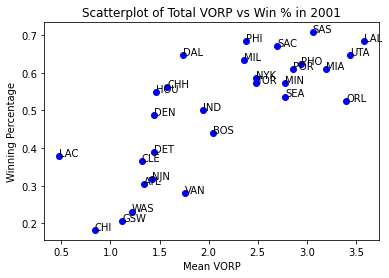

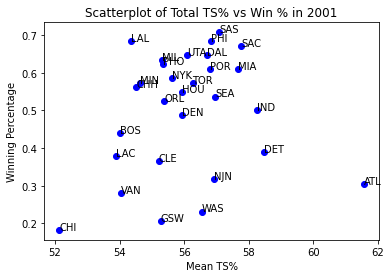

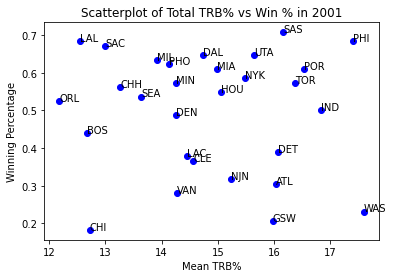

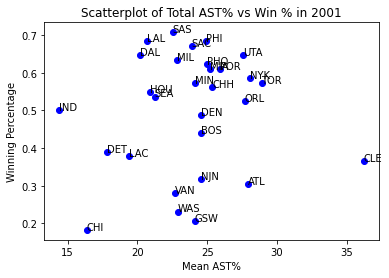

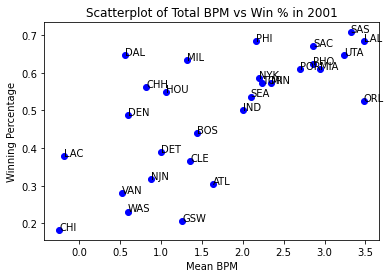

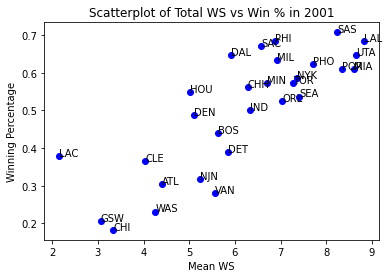

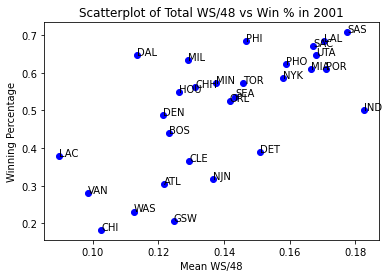

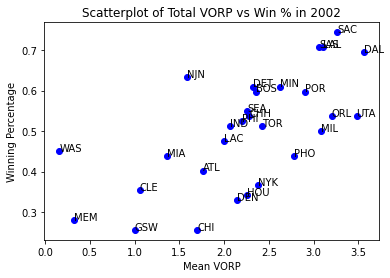

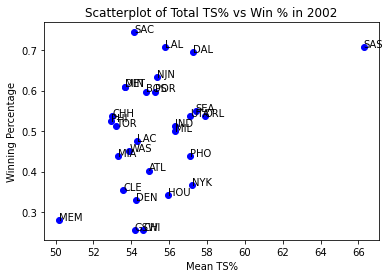

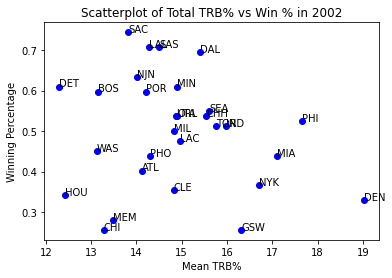

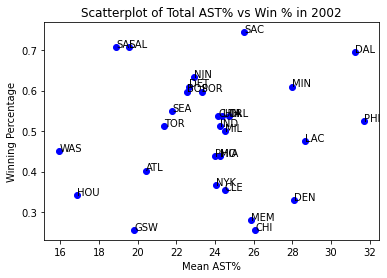

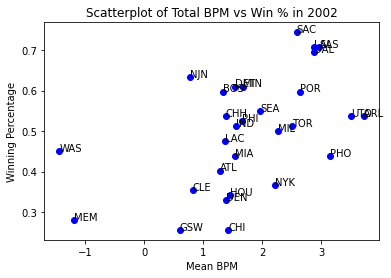

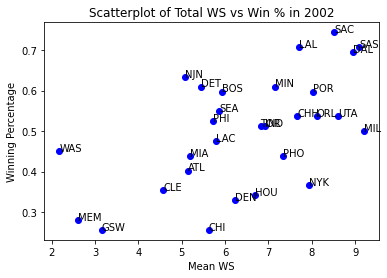

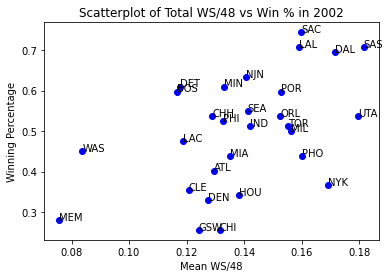

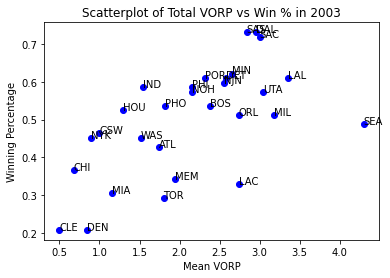

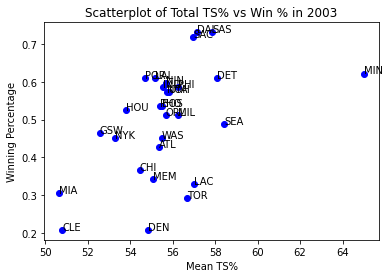

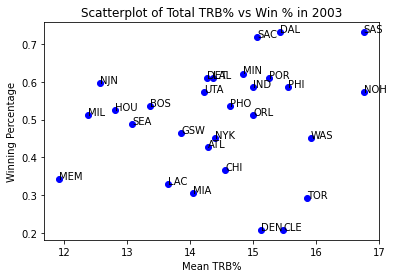

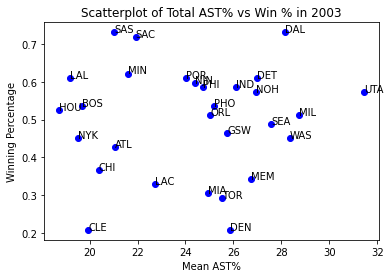

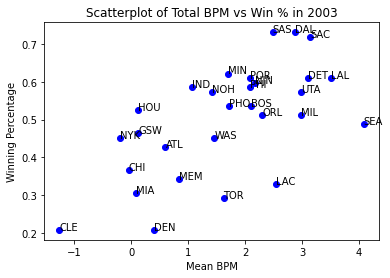

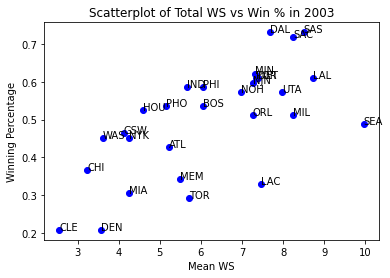

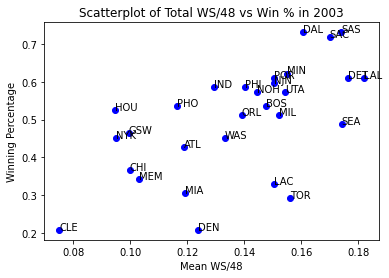

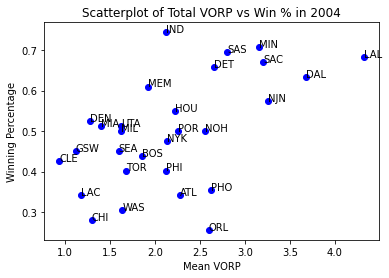

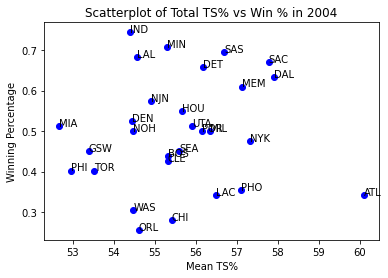

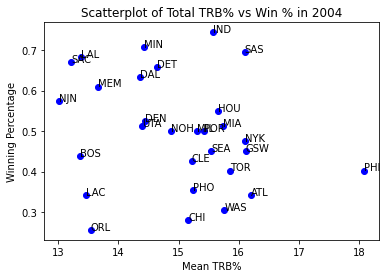

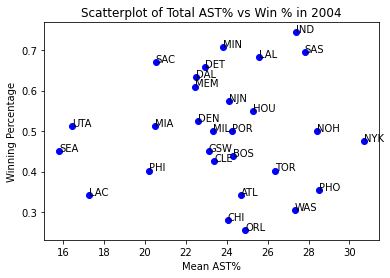

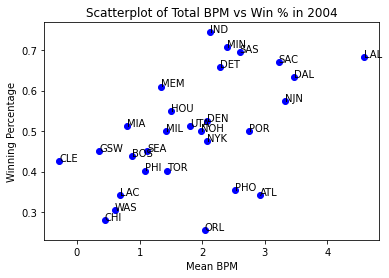

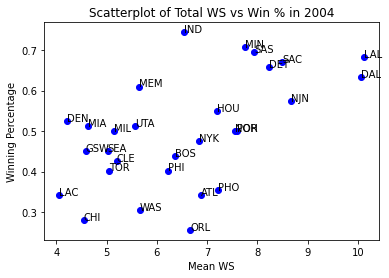

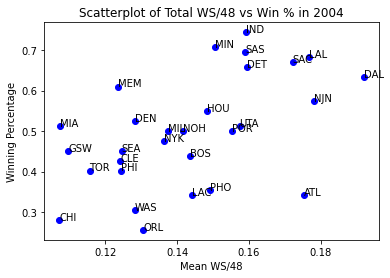

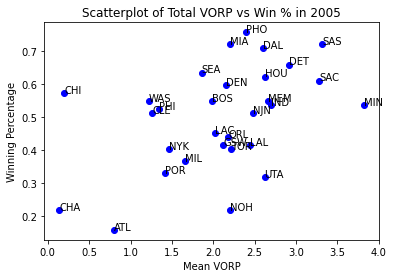

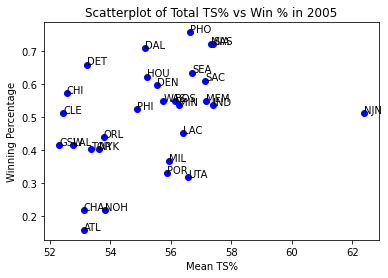

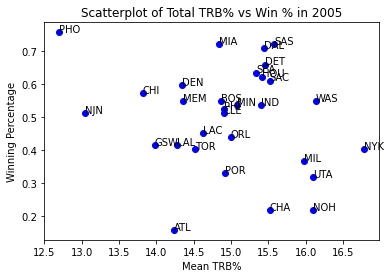

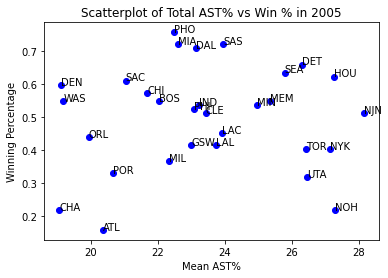

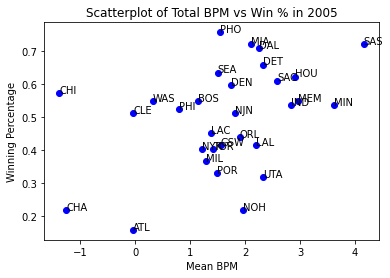

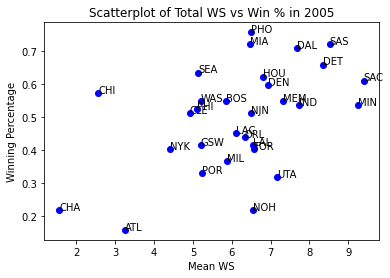

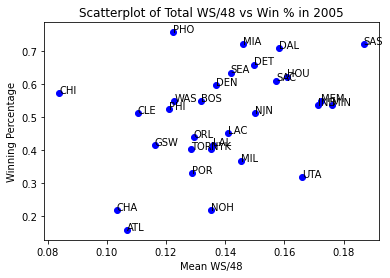

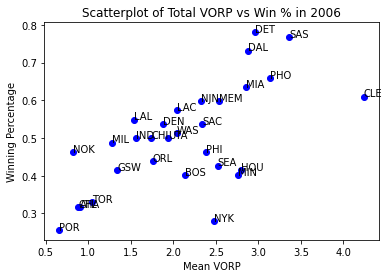

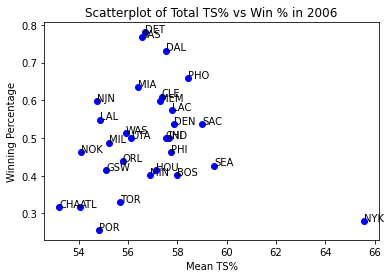

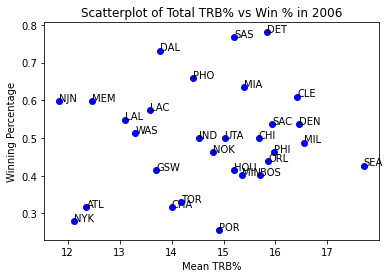

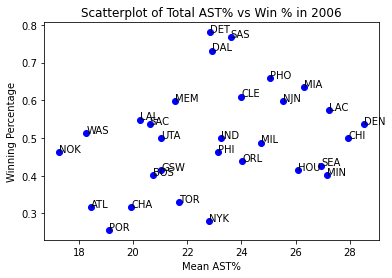

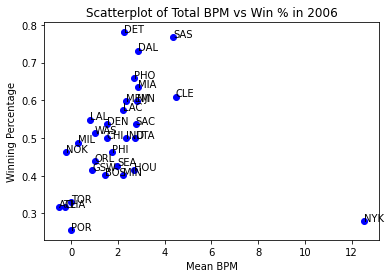

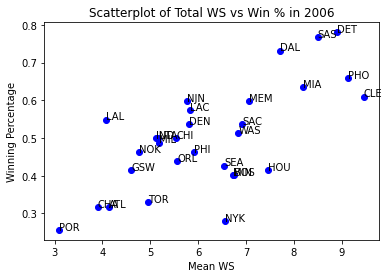

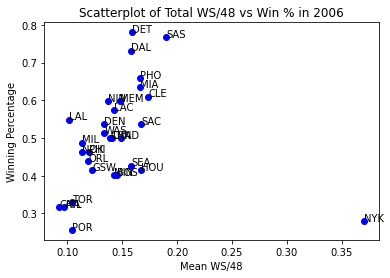

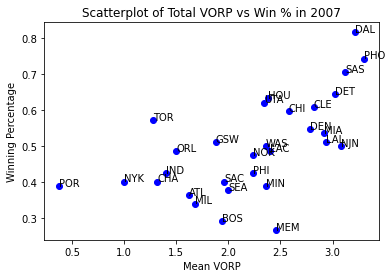

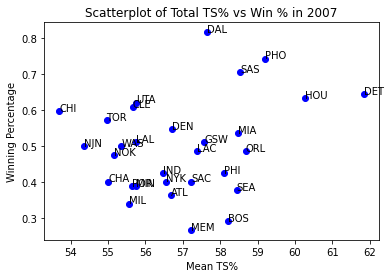

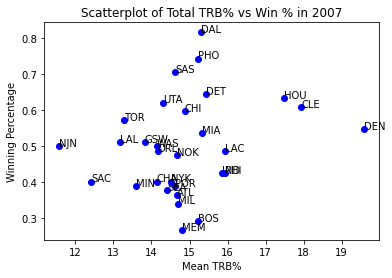

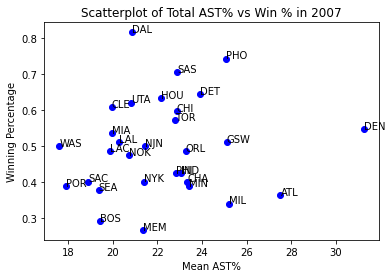

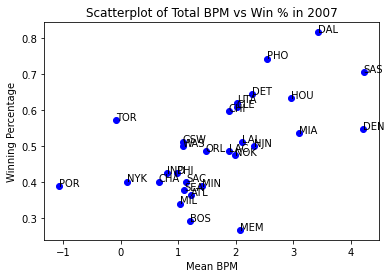

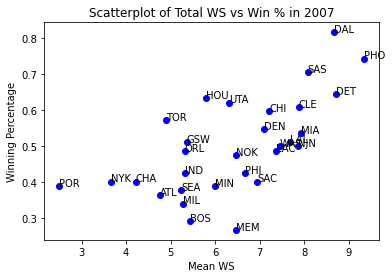

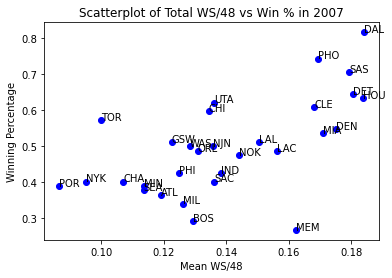

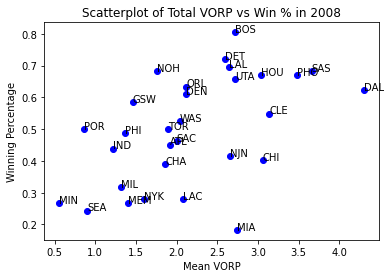

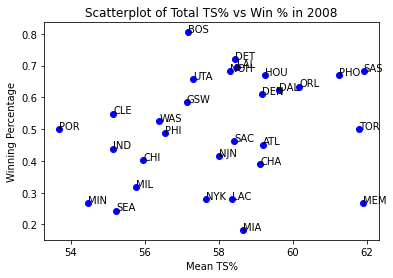

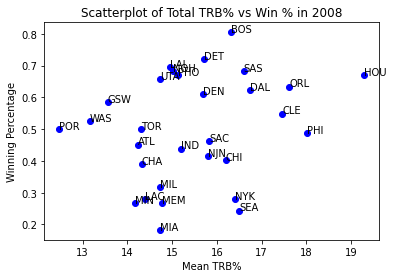

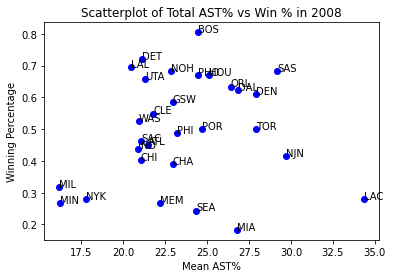

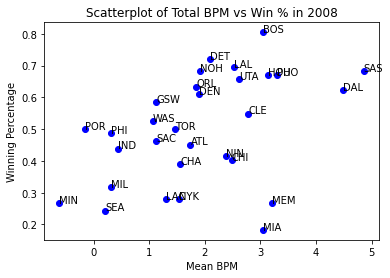

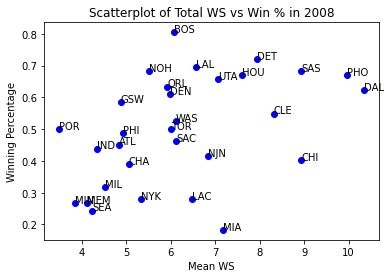

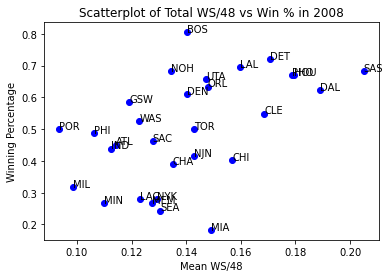

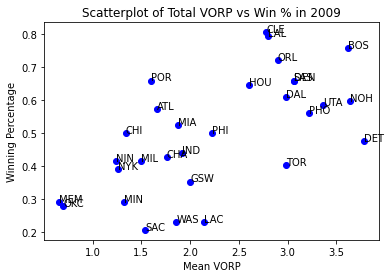

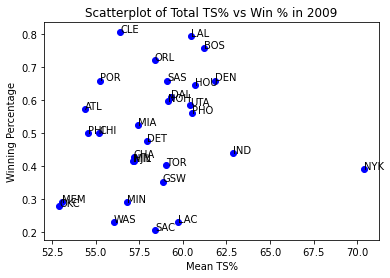

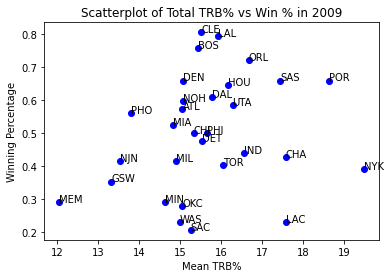

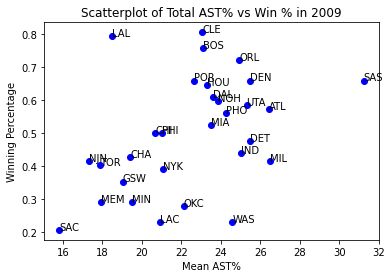

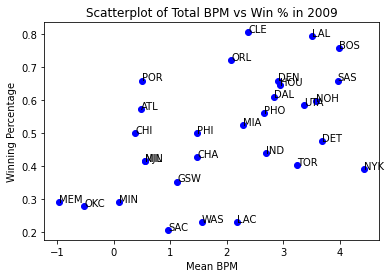

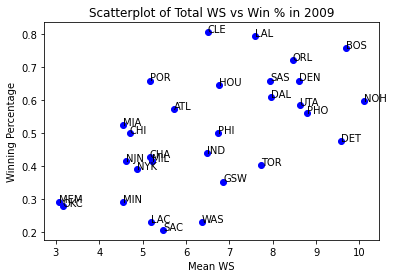

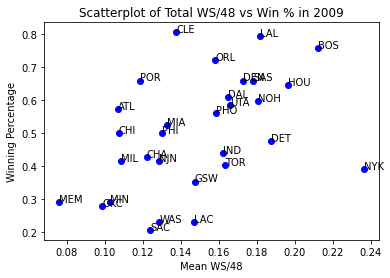

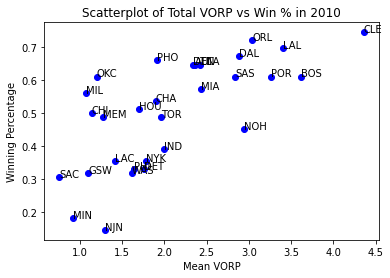

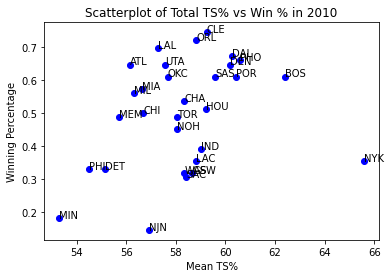

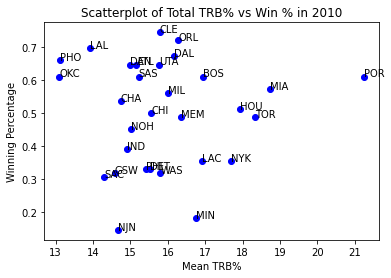

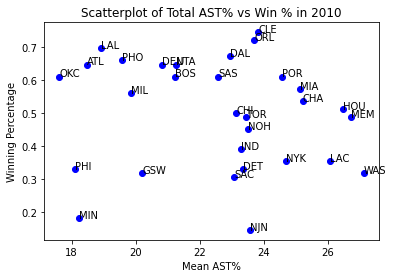

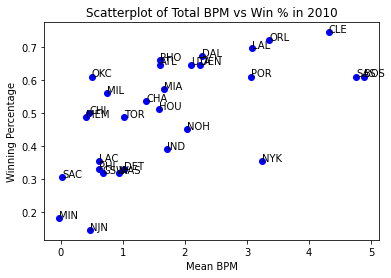

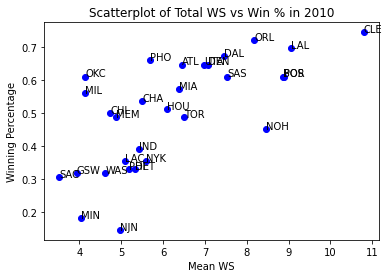

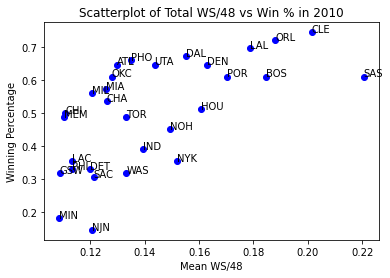

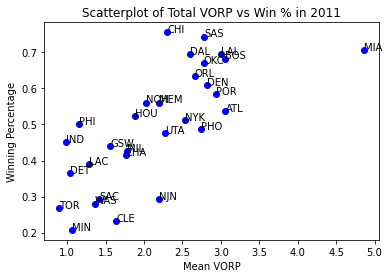

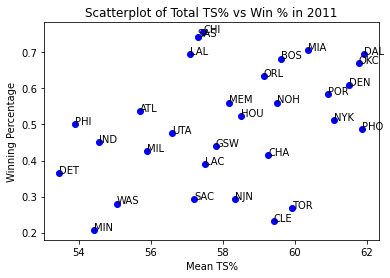

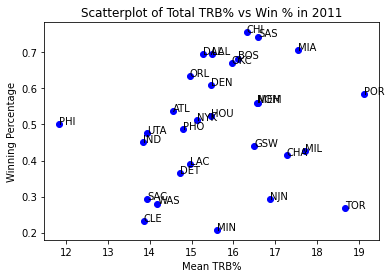

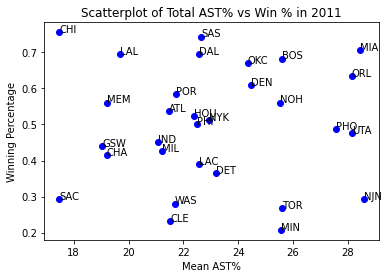

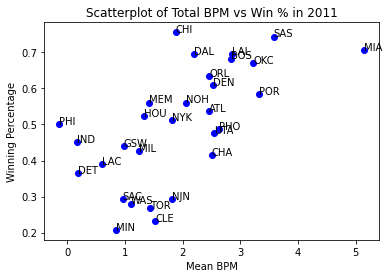

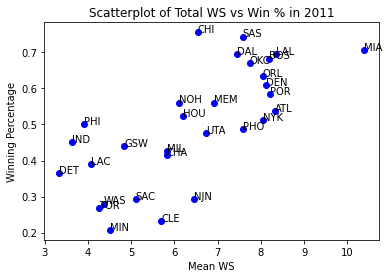

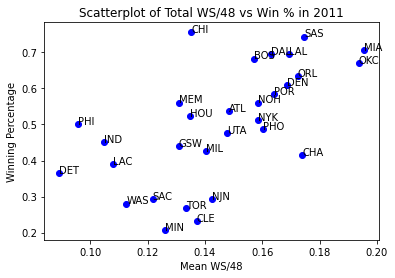

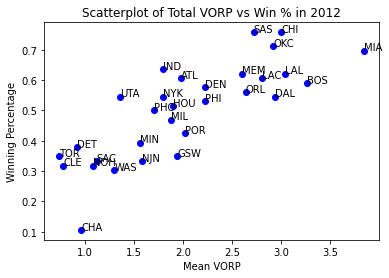

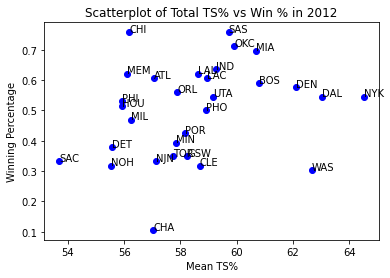

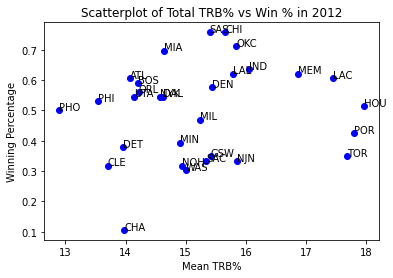

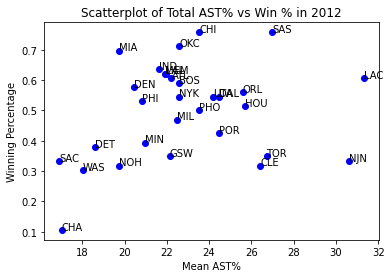

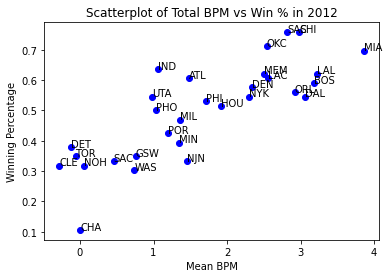

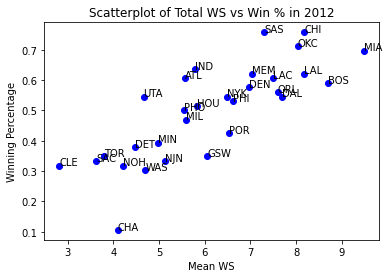

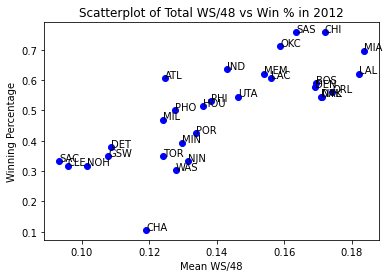

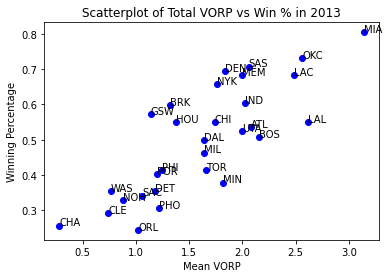

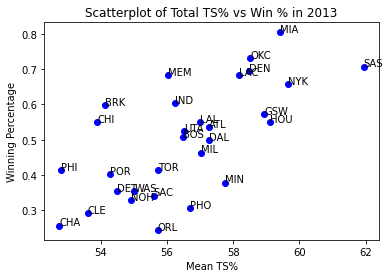

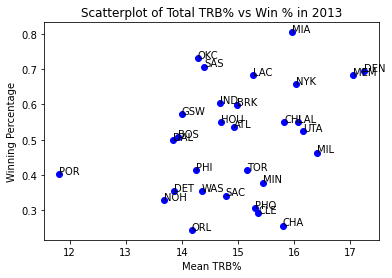

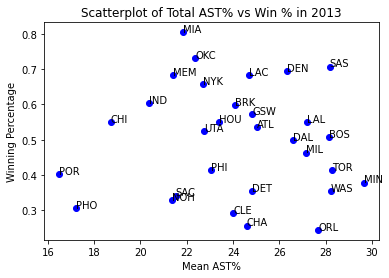

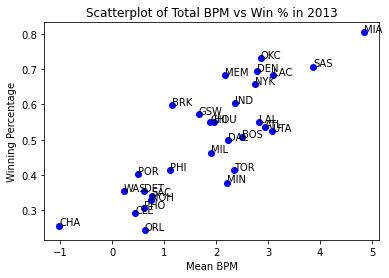

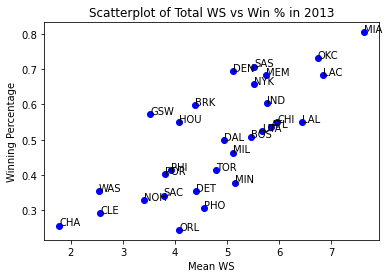

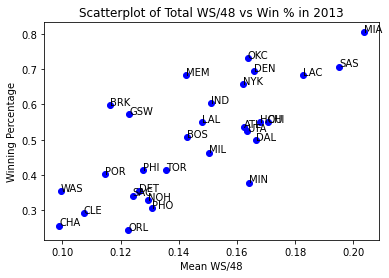

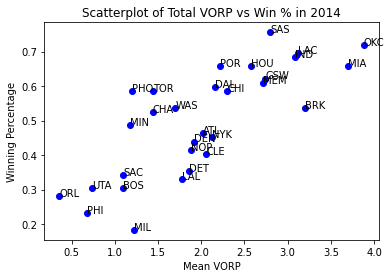

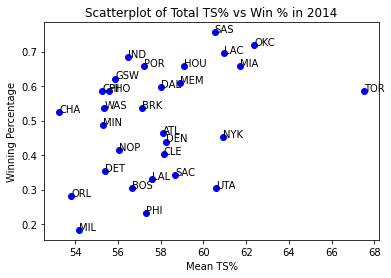

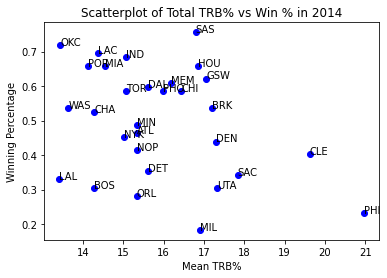

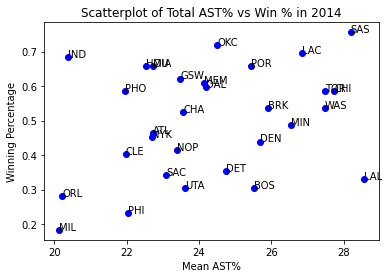

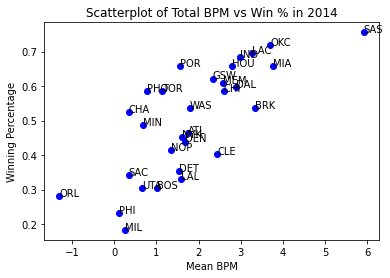

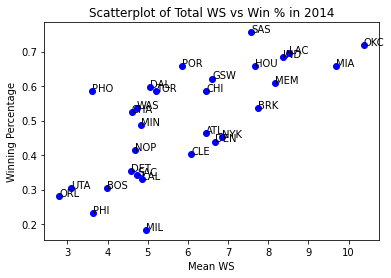

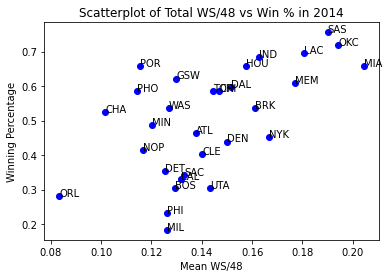

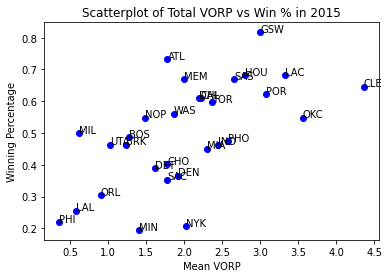

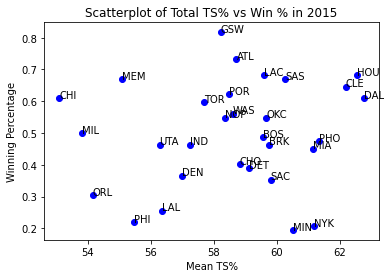

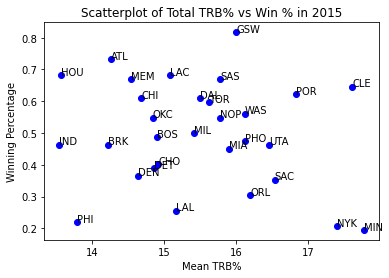

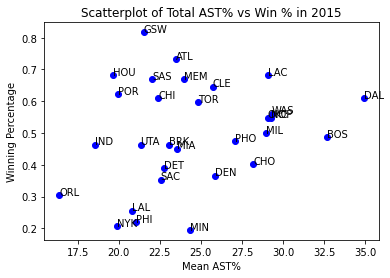

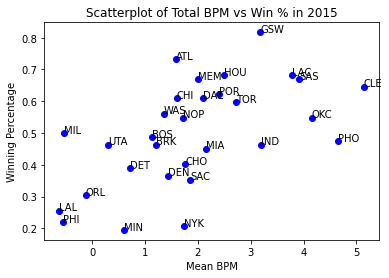

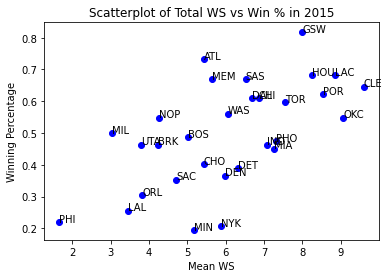

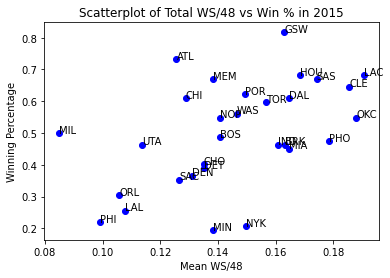

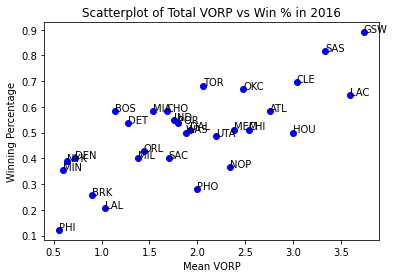

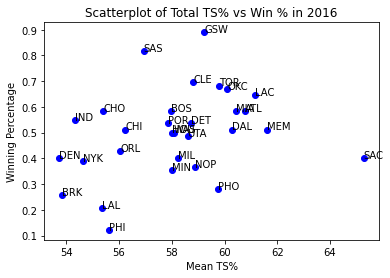

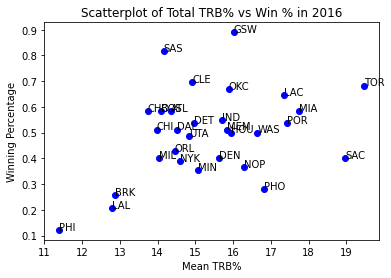

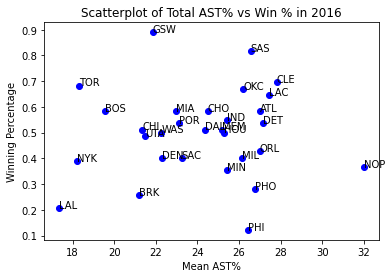

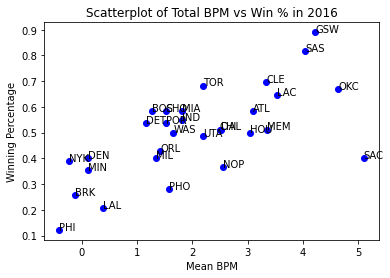

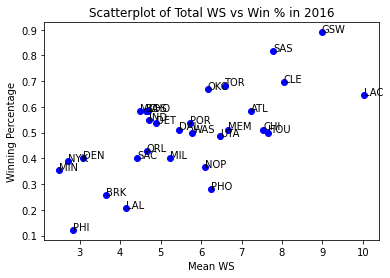

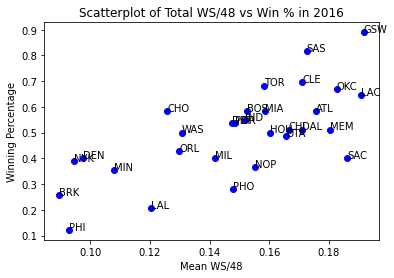

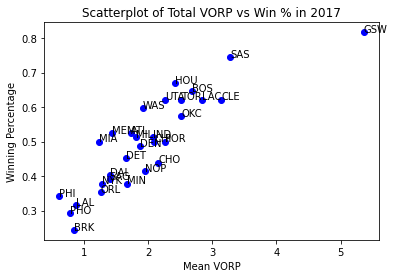

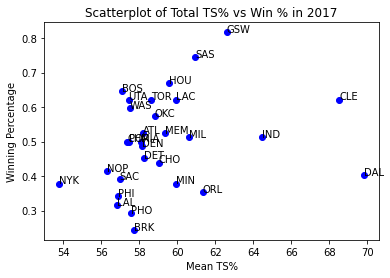

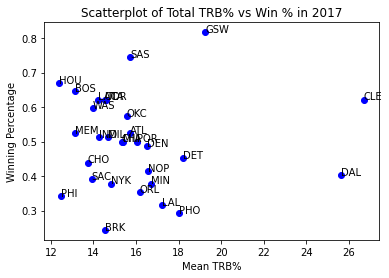

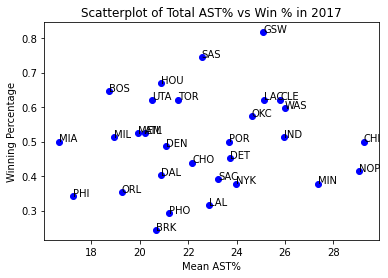

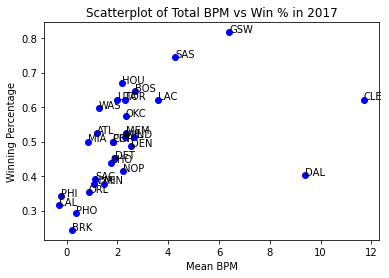

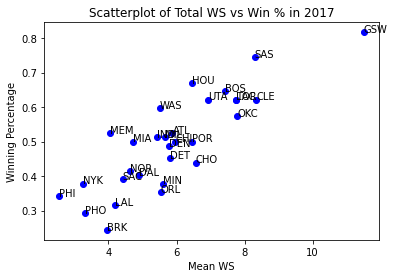

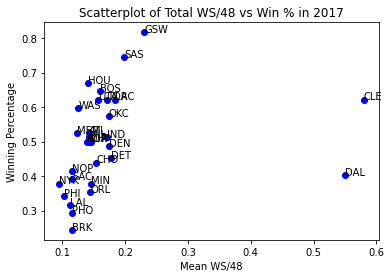

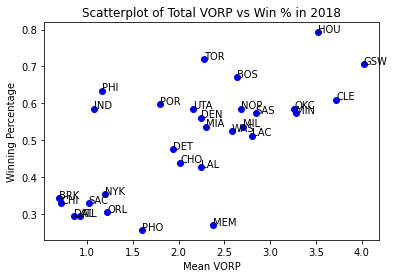

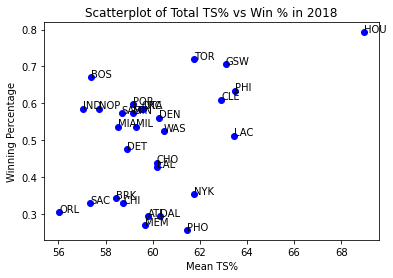

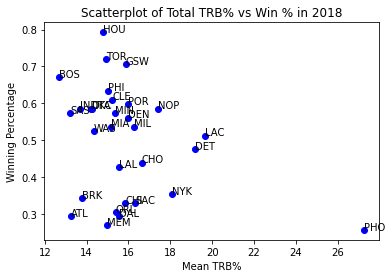

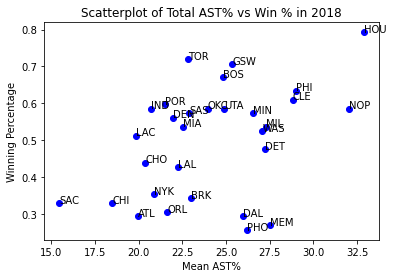

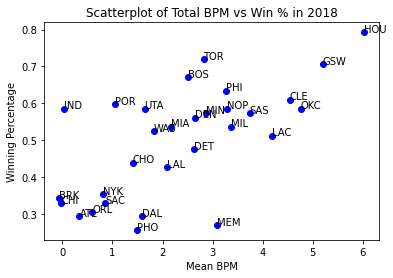

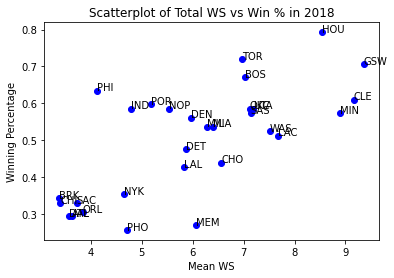

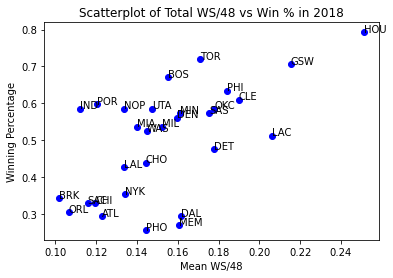

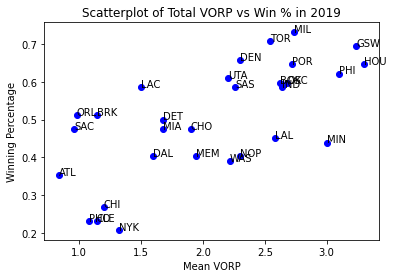

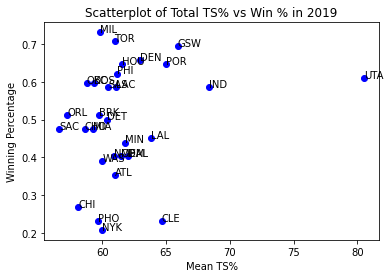

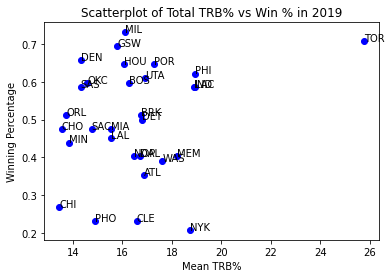

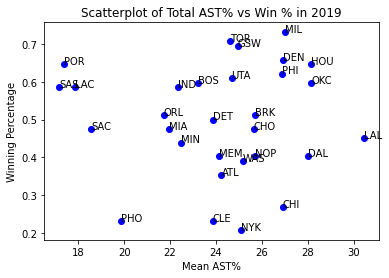

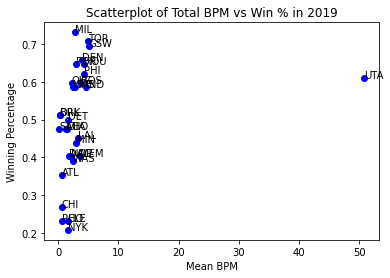

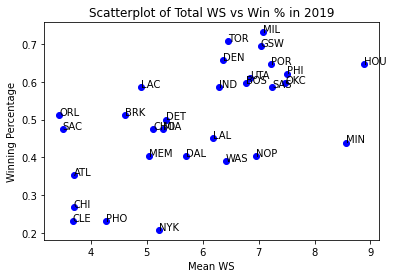

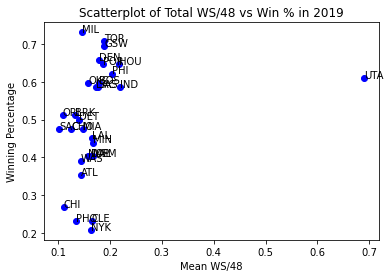

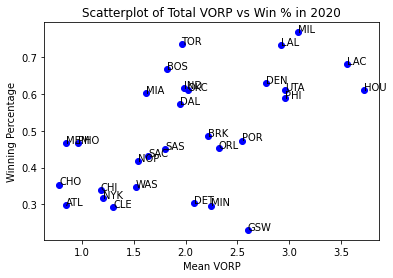

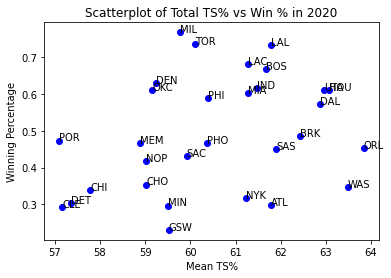

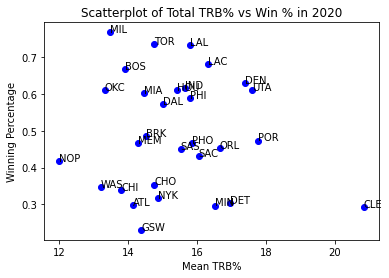

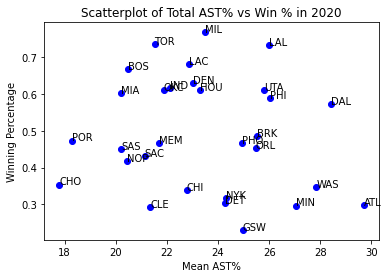

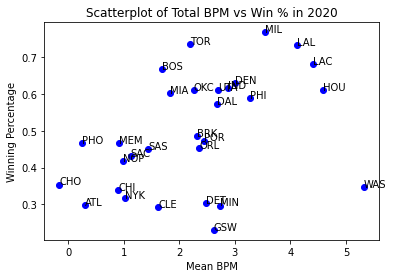

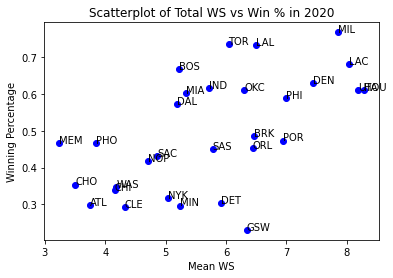

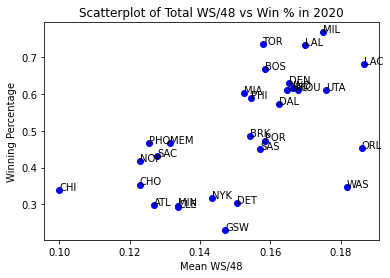

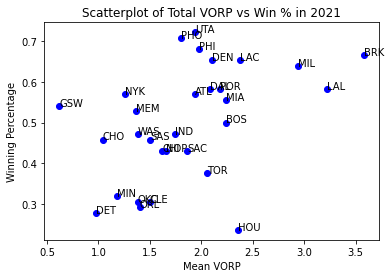

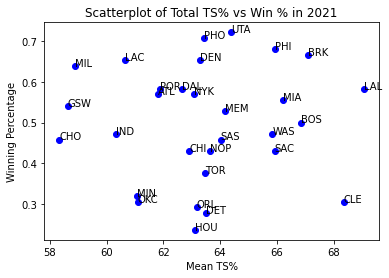

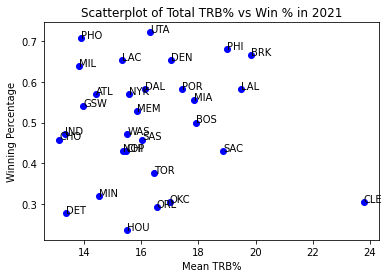

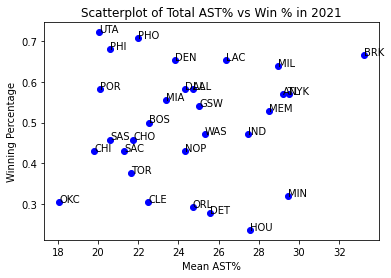

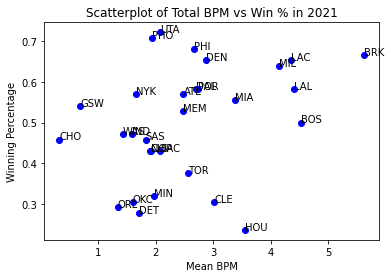

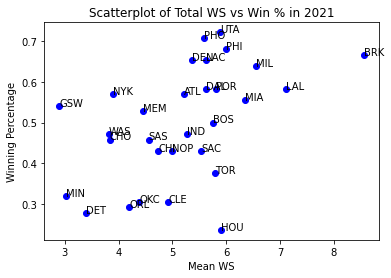

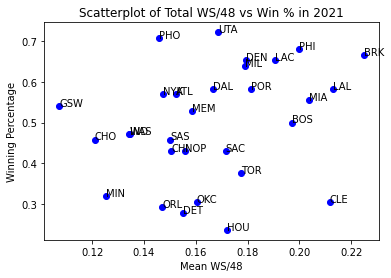

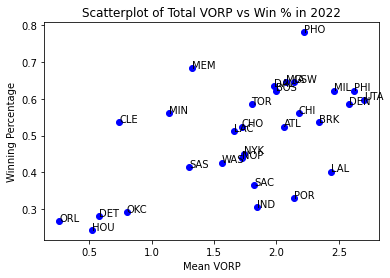

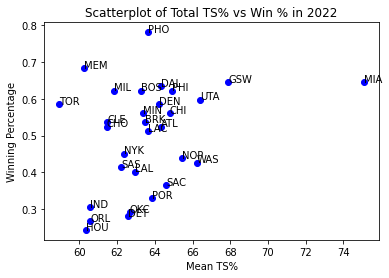

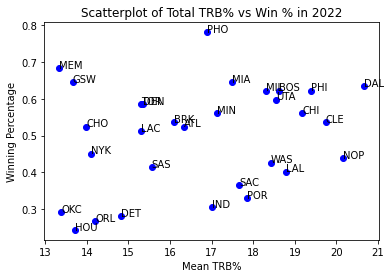

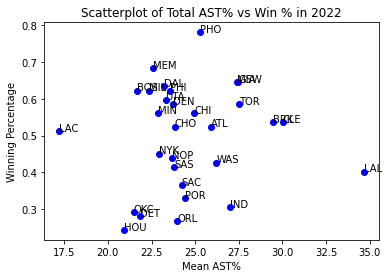

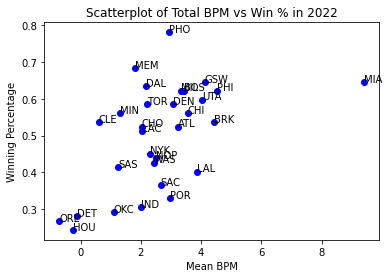

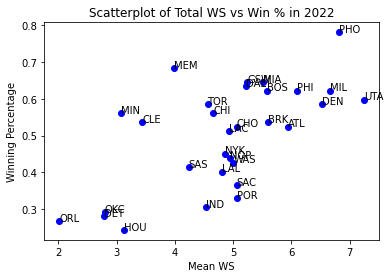

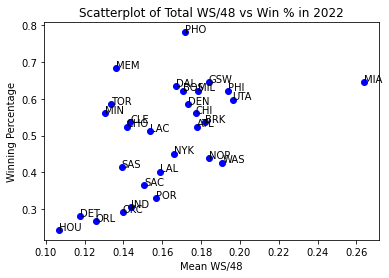

In [702]:
from matplotlib import pyplot as plt

advStats = ['VORP','TS%','TRB%','AST%','BPM', "WS", "WS/48"]

groupedYear = teamStats.groupby('Year')

for key, item in groupedYear:
    yearDF = groupedYear.get_group(key)
    for stat in advStats:
        xAxis = yearDF["Mean " + stat].reset_index(drop=True)
        yAxis = yearDF["Win %"].reset_index(drop=True)
        
        plt.figure()
        plt.scatter(x = xAxis, y = yAxis, color = 'b')
        plt.xlabel("Mean " + stat)
        plt.ylabel("Winning Percentage")
        plt.title("Scatterplot of Total " + stat + " vs Win % in " + str(key)) 

        #putting name of teams next to points
        for i, txt in enumerate(yearDF["Team"]):
            plt.annotate(txt, (xAxis[i], yAxis[i]))
        plt.plot()

violin plot for all teams for all stats

In [657]:
# for stat in advStats:
#     teamStats["Total " + stat] = teamStats["Total " + stat]
#     statPerTeam = list(teamStats.groupby('Team')["Total " + stat].apply(list).values)#creating an array of arrays that have stat for each team
#     teams = teamStats['Team'].unique()
    
#     len(statPerTeam)
    
#     fig, ax = plt.subplots()
    
#     plt.violinplot(dataset=statPerTeam, positions = teams, showmeans = True) #plotting the violinplot
    
#     #labeling and formatting
#     plt.xlabel("Teams")
#     plt.ylabel("Total " + stat)
#     plt.title("Total " + stat + " vs Team")

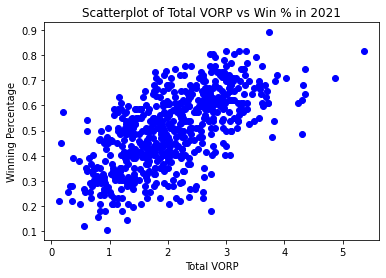

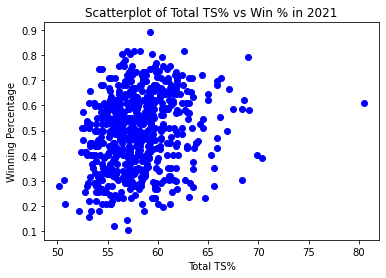

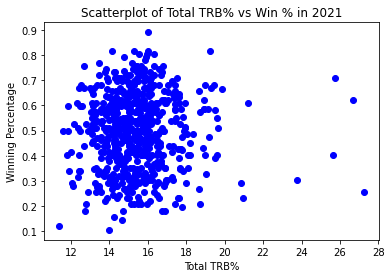

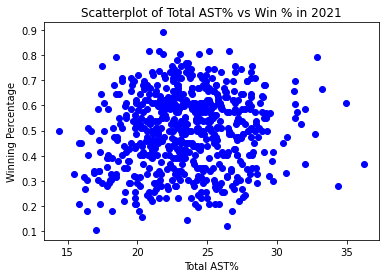

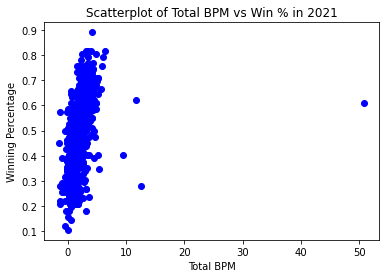

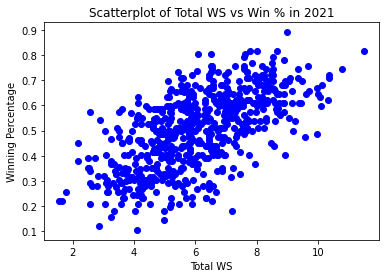

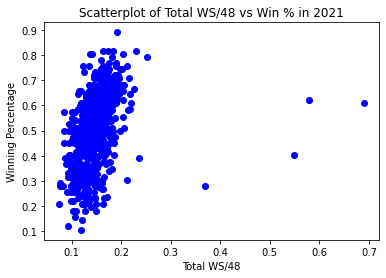

In [667]:
advStats = ['VORP','TS%','TRB%','AST%','BPM', "WS", "WS/48"]

groupedYear = teamStats.groupby('Year')


yearDF = groupedYear.get_group(key)



for stat in advStats:
    xAxis = teamStats["Total " + stat].reset_index(drop=True)
    yAxis = teamStats["Win %"].reset_index(drop=True)
    
    plt.figure()
    plt.scatter(x = xAxis, y = yAxis, color = 'b')
    plt.xlabel("Total " + stat)
    plt.ylabel("Winning Percentage")
    plt.title("Scatterplot of Total " + stat + " vs Win % in " + str(key)) 

    #putting name of teams next to points
#     for i, txt in enumerate(teamStats["Team"]):
#         #if txt == "GSW":
#         plt.annotate(txt + str(teamStats.loc[i,"Year"]), (xAxis[i], yAxis[i]))
    plt.plot()

7.051731211104084e-55


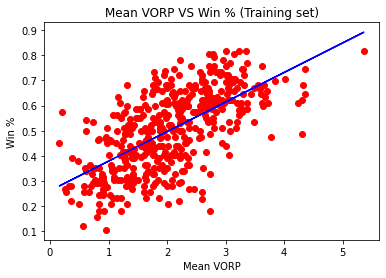

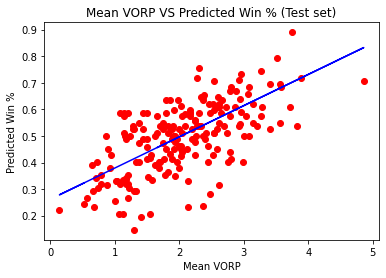

Accuracy of VORP model: 40.769228823531925%
3.7217652967183217e-07


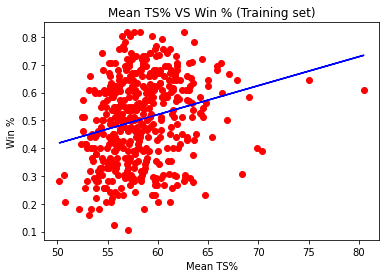

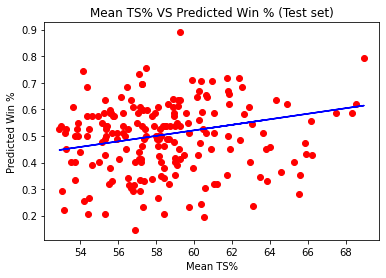

Accuracy of TS% model: -2.3310180928856283%
0.35411133867527256


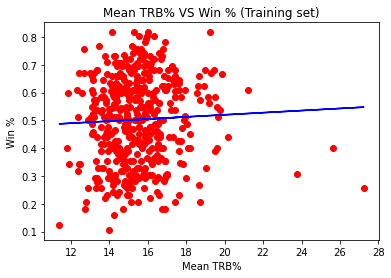

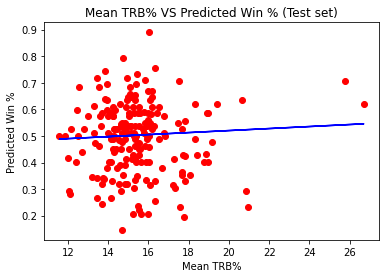

Accuracy of TRB% model: -0.8347837556553106%
0.06267773433824464


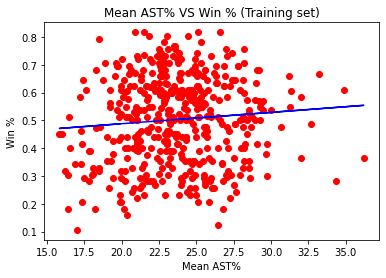

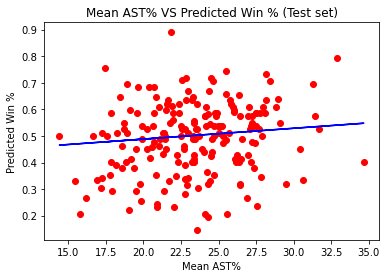

Accuracy of AST% model: 2.317529743224833%
3.161565641503648e-13


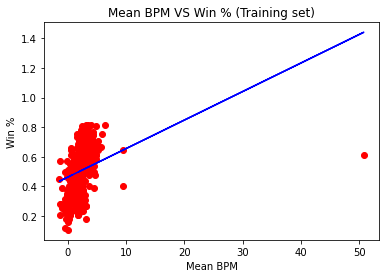

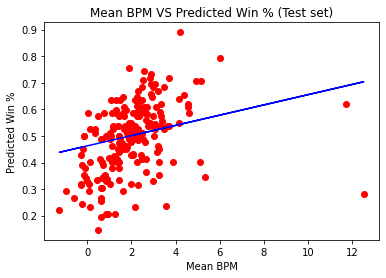

Accuracy of BPM model: 12.44065943038729%
5.215306612355555e-49


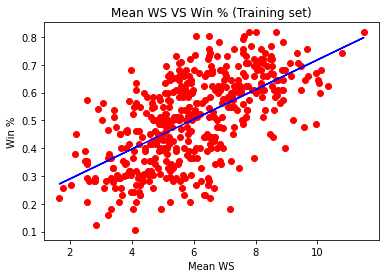

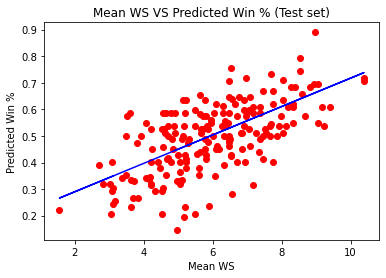

Accuracy of WS model: 40.59160863510615%
3.034983999857896e-17


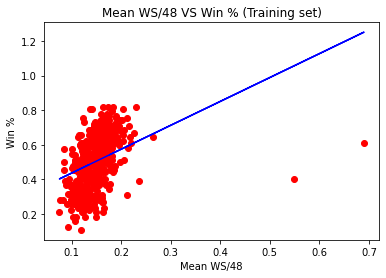

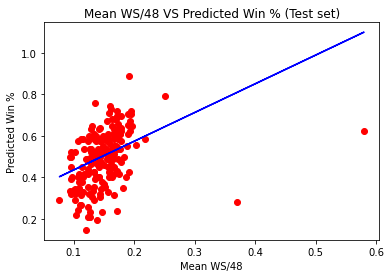

Accuracy of WS/48 model: 8.716023134491891%


In [867]:
from sklearn import linear_model
import sklearn.metrics as met
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

advStats = ['VORP','TS%','TRB%','AST%','BPM', "WS", "WS/48"]

vorpRegressor = None
tsRegressor = None
trbRegressor = None
astRegressor = None
bpmRegressor = None
wsRegressor = None
ws48Regressor = None

for stat in advStats:
    regressor = linear_model.LinearRegression()
    
    X = teamStats["Mean " + stat]
    y = teamStats["Win %"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    X_train= X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    
    
    regressor.fit(X_train, y_train)
    
    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    print(est2.pvalues[1])
    
    plt_train = plt
    plt_train.scatter(X_train, y_train, color='red')
    plt_train.plot(X_train, regressor.predict(X_train), color='blue')
    plt_train.title('Mean '+ stat + ' VS Win % (Training set)')
    plt_train.xlabel('Mean ' + stat)
    plt_train.ylabel('Win %')
    plt_train.show()
    
    plt_test = plt
    plt_test.scatter(X_test, y_test, color='red')
    plt_test.plot(X_test, regressor.predict(X_test), color='blue')
    plt_test.title('Mean '+ stat + ' VS Predicted Win % (Test set)')
    plt_test.xlabel('Mean ' + stat)
    plt_test.ylabel('Predicted Win %')
    plt_test.show()
    
    y_pred = regressor.predict(X_test)
    
    print("Accuracy of " + stat + " model: " + str(regressor.score(X_test,y_test)* 100) + "%")
    
    if stat == 'VORP':
       vorpRegressor = regressor
    elif stat == 'TS%':
        tsRegressor = regressor
    elif stat == 'TRB%':
        trbRegressor = regressor
    elif stat == 'AST%':
        astRegressor = regressor
    elif stat == 'BPM':
        bpmRegressor = regressor
    elif stat == 'WS':
        wsRegressor = regressor
    elif stat == 'WS/48':
        ws48Regressor = regressor

Accuracy of Model on 2021-2022 Season

In [784]:
#using model predictions with columns

# teamStats["Predicted Win % by TS%"] = tsRegressor.predict(teamStats["Mean TS%"].values.reshape(-1, 1))
# teamStats["Predicted Win % by TRB%"] = trbRegressor.predict(teamStats["Mean TRB%"].values.reshape(-1, 1))
# teamStats["Predicted Win % by AST%"] = astRegressor.predict(teamStats["Mean AST%"].values.reshape(-1, 1))
# teamStats["Predicted Win % by BPM"] = bpmRegressor.predict(teamStats["Mean BPM"].values.reshape(-1, 1))
# teamStats["Predicted Win % by WS/48"] = ws48Regressor.predict(teamStats["Mean WS/48"].values.reshape(-1, 1)) 
# teamStats["Residual TS%"] = teamStats["Win %"] - teamStats["Predicted Win % by TS%"]
# teamStats["Residual TRB%"] = teamStats["Win %"] - teamStats["Predicted Win % by TRB%"]
# teamStats["Residual AST%"] = teamStats["Win %"] - teamStats["Predicted Win % by AST%"]
# teamStats["Residual BPM"] = teamStats["Win %"] - teamStats["Predicted Win % by BPM"]
# teamStats["Residual WS/48"] = teamStats["Win %"] - teamStats["Predicted Win % by WS/48"]

# del teamStats["Predicted Win % by TS%"]
# del teamStats["Predicted Win % by TRB%"]
# del teamStats["Predicted Win % by AST%"]
# del teamStats["Predicted Win % by BPM"]
# del teamStats["Predicted Win % by WS/48"]
# del teamStats["Residual TS%"] 
# del teamStats["Residual TRB%"]
# del teamStats["Residual AST%"]
# del teamStats["Residual BPM"]
# del teamStats["Residual WS/48"]

#getting data on eastern conference teams and western conference teams
easternConference = ['ATL','BOS','BRK','CHI','CHO','CLE','DET','IND','MIA','MIL','NYK','ORL','PHI','TOR','WAS']
westernConference = ['DAL','DEN','GSW','HOU','LAC','LAL','MEM','MIN','NOP','OKC','PHO','POR','SAC','SAS','UTA']

#Using vorp regressor to predict the win percentage and number of wins based on the MEAN VORP of the top 5 players
teamStats["Predicted Win % by VORP"] = vorpRegressor.predict(teamStats["Mean VORP"].values.reshape(-1, 1))
teamStats["Predicted Wins by VORP"] = round(teamStats["Predicted Win % by VORP"] * 82).astype(int)#82 games in a season

#Using win share regressor to predict the win percentage and number of wins based on the MEAN WS of the top 5 players
teamStats["Predicted Win % by WS"] = wsRegressor.predict(teamStats["Mean WS"].values.reshape(-1, 1))
teamStats["Predicted Wins by WS"] = round(teamStats["Predicted Win % by WS"] * 82).astype(int)                                                     

#Calculating residuals for vorp win% and ws win%
teamStats["Residual Vorp Win %"] = teamStats["Win %"] - teamStats["Predicted Win % by VORP"]
teamStats["Residual WS Win %"] = teamStats["Win %"] - teamStats["Predicted Win % by WS"]

#setting conferences to each team according to previous lists
teamStats["Conference"] = "East"
checkWest = [entry in westernConference for entry in teamStats['Team']]
teamStats.loc[checkWest, 'Conference'] = "West"

#rankings teams according to the actual season, the VORP predictions, and the WS predictions
teamStats['Actual Conference Rank'] = teamStats.groupby(["Year","Conference"])["Wins"].rank(ascending = False,method = 'first',na_option = "top").astype(int)
teamStats['Predicted VORP Conference Rank'] = teamStats.groupby(["Year","Conference"])["Predicted Wins by VORP"].rank(ascending = False,method = 'first',na_option = "top").astype(int)
teamStats['Predicted WS Conference Rank'] = teamStats.groupby(["Year","Conference"])["Predicted Wins by WS"].rank(ascending = False,method = 'first',na_option = "top").astype(int)

#only looking at the NBA 2022 Season for a Case Study
season22 = teamStats.loc[teamStats['Year'] == 2022]
season22 = season22.reset_index(drop = True)
season22



Year Team  With Top 5 Players  Mean VORP  Mean TS%  Mean TRB%  Mean AST%  \
0   2022  ATL                True       2.06    64.340      16.34      25.88   
1   2022  BOS                True       2.00    63.240      18.62      21.66   
2   2022  BRK                True       2.34    63.500      16.10      29.46   
3   2022  CHI                True       2.18    64.780      19.18      24.94   
4   2022  CHO                True       1.72    61.440      13.98      23.82   
5   2022  CLE                True       0.74    61.480      19.74      30.02   
6   2022  DAL                True       1.98    64.325      20.66      23.22   
7   2022  DEN                True       2.58    64.200      15.36      23.74   
8   2022  DET                True       0.58    62.560      14.82      21.86   
9   2022  GSW                True       2.14    67.900      13.66      27.46   
10  2022  HOU                True       0.52    60.360      13.72      20.90   
11  2022  IND                True       1.84    60.560      17.02      27.00   
12  2022  LAC                True       1.66    63.640      15.30      17.22   
13  2022  LAL                True       2.44    62.940      18.78      34.66   
14  2022  MEM                True       1.32    60.240      13.34      22.60   
15  2022  MIA                True       2.08    75.080      17.50      27.42   
16  2022  MIL                True       2.46    61.840      18.32      22.36   
17  2022  MIN                True       1.14    63.360      17.14      22.86   
18  2022  NOP                True       1.72    65.420      20.16      23.66   
19  2022  NYK                True       1.74    62.380      14.10      22.90   
20  2022  OKC                True       0.80    62.660      13.38      21.48   
21  2022  ORL                True       0.26    60.580      14.20      23.98   
22  2022  PHI                True       2.62    64.900      19.40      23.56   
23  2022  PHO                True       2.22    63.640      16.88      25.30   
24  2022  POR                True       2.14    63.860      17.84      24.44   
25  2022  SAC                True       1.82    64.600      17.66      24.22   
26  2022  SAS                True       1.30    62.200      15.56      23.80   
27  2022  TOR                True       1.80    58.940      15.30      27.50   
28  2022  UTA                True       2.70    66.380      18.54      23.30   
29  2022  WAS                True       1.56    66.240      18.42      26.22   

    Mean BPM  Mean WS  Mean WS/48  ...  Predicted Win % by VORP  \
0       3.24     5.94      0.1778  ...                 0.503790   
1       3.42     5.58      0.1708  ...                 0.496745   
2       4.44     5.60      0.1822  ...                 0.536667   
3       3.56     4.66      0.1772  ...                 0.517880   
4       2.04     5.06      0.1418  ...                 0.463868   
5       0.60     3.44      0.1436  ...                 0.348797   
6       2.18     5.22      0.1670  ...                 0.494396   
7       3.08     6.52      0.1730  ...                 0.564848   
8      -0.10     2.78      0.1176  ...                 0.330010   
9       4.12     5.24      0.1840  ...                 0.513184   
10     -0.26     3.12      0.1070  ...                 0.322965   
11      2.02     4.54      0.1440  ...                 0.477958   
12      2.04     4.92      0.1536  ...                 0.456822   
13      3.88     4.80      0.1590  ...                 0.548409   
14      1.82     3.98      0.1360  ...                 0.416900   
15      9.40     5.52      0.2638  ...                 0.506138   
16      3.32     6.66      0.1784  ...                 0.550758   
17      1.30     3.08      0.1306  ...                 0.395765   
18      2.50     4.94      0.1840  ...                 0.463868   
19      2.30     4.86      0.1662  ...                 0.466216   
20      1.10     2.80      0.1396  ...                 0.355842   
21     -0.70     2.02      0.1256  ...           

Residuals for Win%

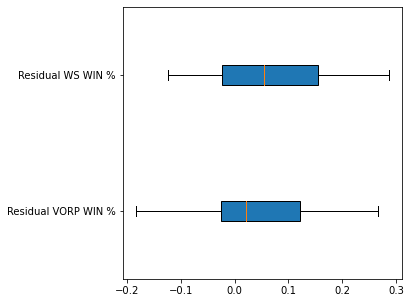

RESIDUAL VORP SUMMARY STATS:
count    30.000000
mean      0.032766
std       0.114768
min      -0.183915
25%      -0.024668
50%       0.020559
75%       0.121931
max       0.266027
Name: Residual Vorp Win %, dtype: float64


RESIDUAL WS SUMMARY STATS:
count    30.000000
mean      0.058120
std       0.110649
min      -0.124097
25%      -0.023101
50%       0.054108
75%       0.154255
max       0.287344
Name: Residual WS Win %, dtype: float64


In [785]:
#looking at the distribution of residuals to compare Vorp and WS

#getting data
data = [season22["Residual Vorp Win %"],season22["Residual WS Win %"]]

#box plot labels
index = ["Residual VORP WIN %","Residual WS WIN %"]

#Creating box plots
fig, axes = plt.subplots(figsize=(5, 5))
bplot = axes.boxplot(data, vert=False,patch_artist=True)  # vertical box plots & fill with color
axes.set_yticklabels(index)

plt.show()

#getting summary statistics of both distributions
print("RESIDUAL VORP SUMMARY STATS:")
print(season22["Residual Vorp Win %"].describe())
print("\n")
print("RESIDUAL WS SUMMARY STATS:")
print(season22["Residual WS Win %"].describe())



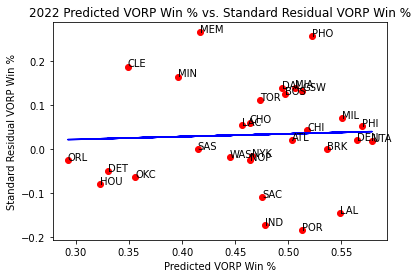

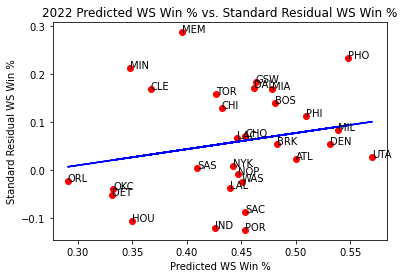

In [825]:
X = season22["Predicted Win % by VORP"]
y = season22["Residual Vorp Win %"]

m, b = np.polyfit(X, y, 1)

plt_train = plt
plt_train.scatter(X, y, color='red')
plt.plot(X, m*X+b, c = 'b')
plt_train.title('2022 Predicted VORP Win % vs. Standard Residual VORP Win %')
plt_train.xlabel('Predicted VORP Win %')
plt_train.ylabel('Standard Residual VORP Win %')
#putting name of teams next to points
for i, txt in enumerate(season22["Team"]):
    if y[i] == 0:
        plt.annotate(txt , (X[i], y[i]),color = 'green')
    else:
        plt.annotate(txt , (X[i], y[i]),color = 'black')
plt_train.show()

X = season22["Predicted Win % by WS"]
y = season22["Residual WS Win %"]

m, b = np.polyfit(X, y, 1)

plt_train = plt
plt_train.scatter(X, y, color='red')
plt.plot(X, m*X+b, c = 'b')
plt_train.title('2022 Predicted WS Win % vs. Standard Residual WS Win %')
plt_train.xlabel('Predicted WS Win %')
plt_train.ylabel('Standard Residual WS Win %')
for i, txt in enumerate(season22["Team"]):
    if y[i] == 0:
        plt.annotate(txt , (X[i], y[i]),color = 'green')
    else:
        plt.annotate(txt , (X[i], y[i]),color = 'black')
plt_train.show()


Eastern Rankings Difference Between Actual, VORP Predictions, and Win Share Predictions
Taking a look at rankings because it is easier to visualize than win percentage

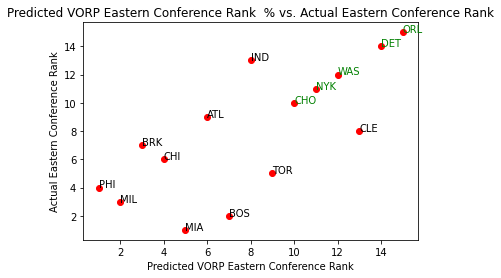

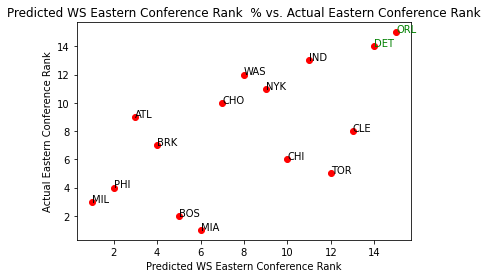

In [820]:
easternRankings22 = season22.loc[(season22["Conference"] == 'East')]
easternRankings22 = easternRankings22[['Year','Team','Actual Conference Rank','Predicted VORP Conference Rank','Predicted WS Conference Rank']]
easternRankings22 = easternRankings22.sort_values('Actual Conference Rank').reset_index(drop = True)

X = easternRankings22["Predicted VORP Conference Rank"]
y = easternRankings22["Actual Conference Rank"]

# m, b = np.polyfit(X, y, 1)

plt_train = plt
plt_train.scatter(X, y, color='red')
# plt.plot(X, m*X+b, c = 'b')
plt_train.title('Predicted VORP Eastern Conference Rank  % vs. Actual Eastern Conference Rank')
plt_train.xlabel('Predicted VORP Eastern Conference Rank')
plt_train.ylabel('Actual Eastern Conference Rank')
#putting name of teams next to points
for i, txt in enumerate(easternRankings22["Team"]):
    if X[i] == y[i]:
        plt.annotate(txt , (X[i], y[i]),color = 'green')
    else:
        plt.annotate(txt , (X[i], y[i]),color = 'black')
plt_train.show()

X = easternRankings22["Predicted WS Conference Rank"]
y = easternRankings22["Actual Conference Rank"]

# m, b = np.polyfit(X, y, 1)

plt_train = plt
plt_train.scatter(X, y, color='red')
# plt.plot(X, m*X+b, c = 'b')
plt_train.title('Predicted WS Eastern Conference Rank  % vs. Actual Eastern Conference Rank')
plt_train.xlabel('Predicted WS Eastern Conference Rank')
plt_train.ylabel('Actual Eastern Conference Rank')
#putting name of teams next to points
for i, txt in enumerate(easternRankings22["Team"]):
    if X[i] == y[i]:
        plt.annotate(txt , (X[i], y[i]),color = 'green')
    else:
        plt.annotate(txt , (X[i], y[i]),color = 'black')
plt_train.show()

Western Rankings Difference Between Actual, VORP Predictions, and Win Share Predictions

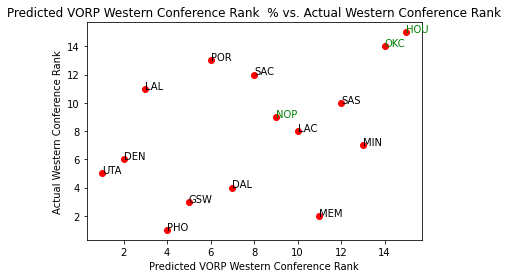

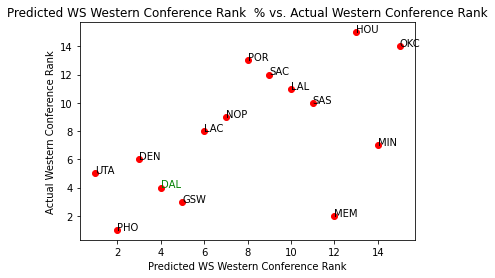

In [827]:
westernRankings22 = season22.loc[(season22["Conference"] == 'West')]
westernRankings22 = westernRankings22[['Year','Team','Actual Conference Rank','Predicted VORP Conference Rank','Predicted WS Conference Rank']]
westernRankings22 = westernRankings22.sort_values('Actual Conference Rank').reset_index(drop = True)

X = westernRankings22["Predicted VORP Conference Rank"]
y = westernRankings22["Actual Conference Rank"]

# m, b = np.polyfit(X, y, 1)

plt_train = plt
plt_train.scatter(X, y, color='red')
# plt.plot(X, m*X+b, c = 'b')
plt_train.title('Predicted VORP Western Conference Rank  % vs. Actual Western Conference Rank')
plt_train.xlabel('Predicted VORP Western Conference Rank')
plt_train.ylabel('Actual Western Conference Rank')
#putting name of teams next to points
for i, txt in enumerate(westernRankings22["Team"]):
    if X[i] == y[i]:
        plt.annotate(txt , (X[i], y[i]),color = 'green')
    else:
        plt.annotate(txt , (X[i], y[i]),color = 'black')
plt_train.show()

X = westernRankings22["Predicted WS Conference Rank"]
y = westernRankings22["Actual Conference Rank"]

# m, b = np.polyfit(X, y, 1)

plt_train = plt
plt_train.scatter(X, y, color='red')
# plt.plot(X, m*X+b, c = 'b')
plt_train.title('Predicted WS Western Conference Rank  % vs. Actual Western Conference Rank')
plt_train.xlabel('Predicted WS Western Conference Rank')
plt_train.ylabel('Actual Western Conference Rank')
#putting name of teams next to points
for i, txt in enumerate(westernRankings22["Team"]):
    if X[i] == y[i]:
        plt.annotate(txt , (X[i], y[i]),color = 'green')
    else:
        plt.annotate(txt , (X[i], y[i]),color = 'black')
plt_train.show()

In [839]:
#Last section looks at how good it is at predicting records/wins of bottom team vs top teams 
easternRankings22['Residual VORP Rank'] = easternRankings22['Actual Conference Rank'] - easternRankings22['Predicted VORP Conference Rank']
easternRankings22['Residual WS Rank'] = easternRankings22['Actual Conference Rank'] - easternRankings22['Predicted WS Conference Rank']
easternRankings22



Year Team  Actual Conference Rank  Predicted VORP Conference Rank  \
0   2022  MIA                       1                               5   
1   2022  BOS                       2                               7   
2   2022  MIL                       3                               2   
3   2022  PHI                       4                               1   
4   2022  TOR                       5                               9   
5   2022  CHI                       6                               4   
6   2022  BRK                       7                               3   
7   2022  CLE                       8                              13   
8   2022  ATL                       9                               6   
9   2022  CHO                      10                              10   
10  2022  NYK                      11                              11   
11  2022  WAS                      12                              12   
12  2022  IND                      13                               8   
13  2022  DET                      14                              14   
14  2022  ORL                      15                              15   

    Predicted WS Conference Rank  Residual VORP Rank  Residual WS Rank  
0                              6                  -4                -5  
1                              5                  -5                -3  
2                              1                   1                 2  
3                              2                   3                 2  
4                             12                  -4                -7  
5                             10                   2                -4  
6                              4                   4                 3  
7                             13                  -5                -5  
8                              3                   3                 6  
9                              7                   0                 3  
10                             9                   0                 2  
11                             8                   0                 4  
12                            11                   5                 2  
13                            14                   0                 0  
14                            15                   0                 0

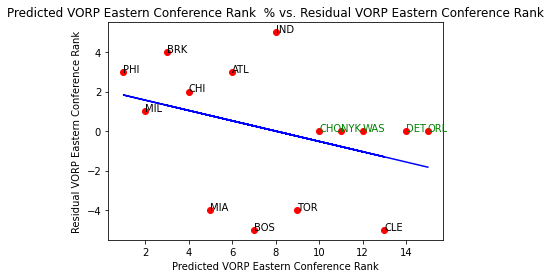

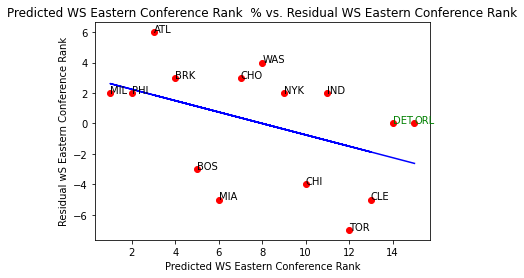

In [840]:
X = easternRankings22["Predicted VORP Conference Rank"]
y = easternRankings22["Residual VORP Rank"]

m, b = np.polyfit(X, y, 1)

plt_train = plt
plt_train.scatter(X, y, color='red')
plt.plot(X, m*X+b, c = 'b')
plt_train.title('Predicted VORP Eastern Conference Rank  % vs. Residual VORP Eastern Conference Rank')
plt_train.xlabel('Predicted VORP Eastern Conference Rank')
plt_train.ylabel('Residual VORP Eastern Conference Rank')
#putting name of teams next to points
for i, txt in enumerate(easternRankings22["Team"]):
    if y[i] == 0:
        plt.annotate(txt , (X[i], y[i]),color = 'green')
    else:
        plt.annotate(txt , (X[i], y[i]),color = 'black')
plt_train.show()

X = easternRankings22["Predicted WS Conference Rank"]
y = easternRankings22["Residual WS Rank"]

m, b = np.polyfit(X, y, 1)

plt_train = plt
plt_train.scatter(X, y, color='red')
plt.plot(X, m*X+b, c = 'b')
plt_train.title('Predicted WS Eastern Conference Rank  % vs. Residual WS Eastern Conference Rank')
plt_train.xlabel('Predicted WS Eastern Conference Rank')
plt_train.ylabel('Residual wS Eastern Conference Rank')
#putting name of teams next to points
for i, txt in enumerate(easternRankings22["Team"]):
    if y[i] == 0:
        plt.annotate(txt , (X[i], y[i]),color = 'green')
    else:
        plt.annotate(txt , (X[i], y[i]),color = 'black')
plt_train.show()

In [841]:
westernRankings22['Residual VORP Rank'] = westernRankings22['Actual Conference Rank'] - westernRankings22['Predicted VORP Conference Rank']
westernRankings22['Residual WS Rank'] = westernRankings22['Actual Conference Rank'] - westernRankings22['Predicted WS Conference Rank']
westernRankings22



Year Team  Actual Conference Rank  Predicted VORP Conference Rank  \
0   2022  PHO                       1                               4   
1   2022  MEM                       2                              11   
2   2022  GSW                       3                               5   
3   2022  DAL                       4                               7   
4   2022  UTA                       5                               1   
5   2022  DEN                       6                               2   
6   2022  MIN                       7                              13   
7   2022  LAC                       8                              10   
8   2022  NOP                       9                               9   
9   2022  SAS                      10                              12   
10  2022  LAL                      11                               3   
11  2022  SAC                      12                               8   
12  2022  POR                      13                               6   
13  2022  OKC                      14                              14   
14  2022  HOU                      15                              15   

    Predicted WS Conference Rank  Residual VORP Rank  Residual WS Rank  
0                              2                  -3                -1  
1                             12                  -9               -10  
2                              5                  -2                -2  
3                              4                  -3                 0  
4                              1                   4                 4  
5                              3                   4                 3  
6                             14                  -6                -7  
7                              6                  -2                 2  
8                              7                   0                 2  
9                             11                  -2                -1  
10                            10                   8                 1  
11                             9                   4                 3  
12                             8                   7                 5  
13                            15                   0                -1  
14                            13                   0                 2

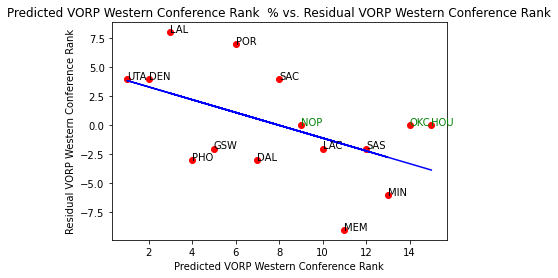

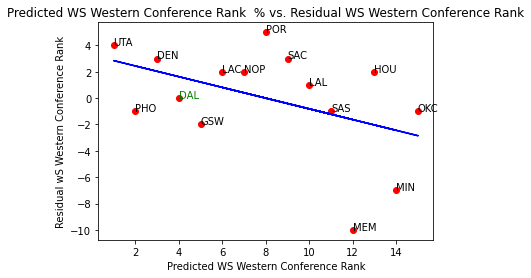

In [842]:
X = westernRankings22["Predicted VORP Conference Rank"]
y = westernRankings22["Residual VORP Rank"]

m, b = np.polyfit(X, y, 1)

plt_train = plt
plt_train.scatter(X, y, color='red')
plt.plot(X, m*X+b, c = 'b')
plt_train.title('Predicted VORP Western Conference Rank  % vs. Residual VORP Western Conference Rank')
plt_train.xlabel('Predicted VORP Western Conference Rank')
plt_train.ylabel('Residual VORP Western Conference Rank')
#putting name of teams next to points
for i, txt in enumerate(westernRankings22["Team"]):
    if y[i] == 0:
        plt.annotate(txt , (X[i], y[i]),color = 'green')
    else:
        plt.annotate(txt , (X[i], y[i]),color = 'black')
plt_train.show()

X = westernRankings22["Predicted WS Conference Rank"]
y = westernRankings22["Residual WS Rank"]

m, b = np.polyfit(X, y, 1)

plt_train = plt
plt_train.scatter(X, y, color='red')
plt.plot(X, m*X+b, c = 'b')
plt_train.title('Predicted WS Western Conference Rank  % vs. Residual WS Western Conference Rank')
plt_train.xlabel('Predicted WS Western Conference Rank')
plt_train.ylabel('Residual wS Western Conference Rank')
#putting name of teams next to points
for i, txt in enumerate(westernRankings22["Team"]):
    if y[i] == 0:
        plt.annotate(txt , (X[i], y[i]),color = 'green')
    else:
        plt.annotate(txt , (X[i], y[i]),color = 'black')
plt_train.show()

Let's show the overall average difference

In [848]:
avgEasternVORPResidual = easternRankings22["Residual VORP Rank"].abs().mean()
avgEasternWSResidual = easternRankings22["Residual WS Rank"].abs().mean()

avgWesternVORPResidual = westernRankings22["Residual VORP Rank"].abs().mean()
avgWesternWSResidual = westernRankings22["Residual WS Rank"].abs().mean()

print(avgEasternVORPResidual)
print(avgEasternWSResidual)
print(avgWesternVORPResidual)
print(avgWesternWSResidual)

2.4
3.2
3.6
2.933333333333333


In [855]:
#residual rank for all teams
#first need to split east and west

allEastTeamStats = teamStats.loc[(teamStats["Conference"] == 'East')].reset_index(drop = True)
allWestTeamStats = teamStats.loc[(teamStats["Conference"] == 'West')].reset_index(drop = True)

allEastTeamStats["Residual VORP Rank"] = allEastTeamStats["Actual Conference Rank"] - allEastTeamStats["Predicted VORP Conference Rank"]
allEastTeamStats["Residual WS Rank"] = allEastTeamStats["Actual Conference Rank"] - allEastTeamStats["Predicted WS Conference Rank"]

allWestTeamStats["Residual VORP Rank"] = allWestTeamStats["Actual Conference Rank"] - allWestTeamStats["Predicted VORP Conference Rank"]
allWestTeamStats["Residual WS Rank"] = allWestTeamStats["Actual Conference Rank"] - allWestTeamStats["Predicted WS Conference Rank"]


avgEasternVORPResidual = ((allEastTeamStats["Residual VORP Rank"] ** 2).mean())/len(allEastTeamStats["Residual VORP Rank"] - 2)
avgEasternWSResidual = ((allEastTeamStats["Residual WS Rank"] ** 2).mean())/len(allEastTeamStats["Residual WS Rank"] - 2)

avgWesternVORPResidual = ((allWestTeamStats["Residual VORP Rank"] ** 2).mean())/len(allWestTeamStats["Residual VORP Rank"] - 2)
avgWesternWSResidual = ((allWestTeamStats["Residual WS Rank"] ** 2).mean())/len(allWestTeamStats["Residual WS Rank"] - 2)

print(avgEasternVORPResidual)
print(avgEasternWSResidual)
print(avgWesternVORPResidual)
print(avgWesternWSResidual)

0.04937904610912935
0.05048553309552121
0.03520829819531118
0.03925619834710744
